# Números para leer mejor
## Universo Borges
### Por: Angela Cristina Villate

![Borges](nubeBorges.png)

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
archivo_excel = "borges.xlsx"  # Cambiar por el nombre de tu archivo Excel
datos = pd.read_excel(archivo_excel)
datos

año                             nombre  \
0   1923             ferbor de buenos aires   
1   1929                cuaderno san martín   
2   1932  la supersticiosa ética del lector   
3   1932      la postulación de la realidad   
4   1935   historia universal de la infamia   
5   1944                          ficciones   
6   1944                          ficciones   
7   1944                          ficciones   
8   1944                          ficciones   
9   1944                          ficciones   
10  1944                          ficciones   
11  1944                          ficciones   
12  1944                          ficciones   
13  1949                           el aleph   
14  1949                           el aleph   
15  1949                           el aleph   
16  1949                           el aleph   
17  1949                           el aleph   
18  1949                           el aleph   
19  1949                           el aleph   
20  1949                           el aleph   
21  1949                           el aleph   
22  1949                           el aleph   
23  1949                           el aleph   
24  1949                           el aleph   
25  1949                           el aleph   
26  1949                           el aleph   
27  1949                           el aleph   
28  1949                           el aleph   
29  1952                otras inquisiciones   
30  1952                otras inquisiciones   
31  1952                otras inquisiciones   
32  1960                         el hacedor   
33  1964                   el otro el mismo   
34  1965              para las seis cuerdas   
35  1970               el informe de brodie   
36  1970               el informe de brodie   
37  1970               el informe de brodie   
38  1970               el informe de brodie   
39  1971               el informe de brodie   

                                                texto  
0   Fervor de Buenos Aires (1923)\n\n\n\nPRÓLOGO\n...  
1   Cuaderno San Martín (1929)\n\nAs to an occasio...  
2   LA SUPERSTICIOSA ÉTICA DEL LECTOR\n\n\n       ...  
3   LA POSTULACIÓN DE LA REALIDAD\n\n\n      Hume ...  
4   Hombre de la esquina rosada\nHistoria universa...  
5   Tlön, Uqbar, Orbis Tertius\n(El jardín de send...  
6   Pierre Menard, autor del Quijote\n(El jardín d...  
7    Pierre Menard, autor del Quijote\n(El jardín ...  
8   Las ruinas circulares\n(El jardín de senderos ...  
9   La loteria en Babilonia\n(El jardín de sendero...  
10  Examen de la obra de Herbert Quain\nEl jardín ...  
11  La biblioteca de Babel\n(El jardín de senderos...  
12  El jardín de senderos que se bifurcan\n(El jar...  
13  El inmortal\n(El Aleph (1949)\n\n      Solomon...  
14  El muerto\n(El Aleph (1949)\n\n\n         Que ...  
15   Los teólogos\n(El Aleph (1949)\n\n\n         ...  
16  Historia del guerrero y de la cautiva\n(El Ale...  
17  Biografía de Tadeo Isidoro Cruz\n(1829-1874)\n...  
18  Emma Zunz\n(El Aleph (1949)\n\n\n         El c...  
19  La casa de Asterión\n(El Aleph (1949)\n\n     ...  
20  La otra muerte\n(El Aleph (1949)\n\n\n        ...  
21  Deutsches Requiem\n(El Aleph, 1949)\n\n       ...  
22  El Zahir\n(El Aleph, 1949)\n\n\n\n\n\n        ...  
23  La escritura del dios\n(El Aleph (1949)\n\n\n ...  
24  Los dos reyes y los dos laberintos [1]\n(El Al...  
25  La espera\n(El Aleph (1949)\n\n\n         El c...  
26  El hombre en el umbral\n(El Aleph (1949)\n\n\n...  
27  El Aleph\n(El Aleph (1949)\n\n      O God, I c...  
28  EPÍLOGO\n(El Aleph (1949)\n\n\n\n         Fuer...  
29  Otras inquisiciones (1952)\n\nEl espejo de los...  
30   NUEVA REFUTACIÓN DEL TIEMPO\n\nVor mir war ke...  
31  El hacedor (1960)\n\n\n\nA LEOPOLDO LUGONES\n\...  
32  A LEOPOLDO LUGONES\n\nLos rumores de la plaza ...  
33  El otro, el mismo (1964)\n\n\n\nPRÓLOGO\n\n\nD...  
34  Para las seis cuerdas (1965)\n\n\n\nPRÓLOGO\n\...  
35  La intrusa\n(El informe de Brodie, 1970)\n\n\n...  
36  H

In [4]:
import pandas as pd

archivo_excel = "borges.xlsx"  # Cambiar por el nombre de tu archivo Excel
datos = pd.read_excel(archivo_excel)

# Mostrar las primeras filas de los datos para entender su estructura
print(datos.head())

    año                             nombre  \
0  1923             ferbor de buenos aires   
1  1929                cuaderno san martín   
2  1932  la supersticiosa ética del lector   
3  1932      la postulación de la realidad   
4  1935   historia universal de la infamia   

                                               texto  
0  Fervor de Buenos Aires (1923)\n\n\n\nPRÓLOGO\n...  
1  Cuaderno San Martín (1929)\n\nAs to an occasio...  
2  LA SUPERSTICIOSA ÉTICA DEL LECTOR\n\n\n       ...  
3  LA POSTULACIÓN DE LA REALIDAD\n\n\n      Hume ...  
4  Hombre de la esquina rosada\nHistoria universa...  


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Definir stopwords en español
stop_words = set(stopwords.words('spanish'))

# Inicializar stemmer para español
stemmer = SnowballStemmer('spanish')

# Función para preprocesar texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text.lower())
    
    # Eliminar puntuación y stopwords, y aplicar lematización
    preprocessed_tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
    
    return preprocessed_tokens

# Aplicar preprocesamiento al texto en la columna "texto"
datos['texto_preprocesado'] = datos['texto'].apply(preprocess_text)

# Mostrar los primeros documentos preprocesados
print(datos['texto_preprocesado'].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [fervor, buen, air, 1923, prolog, edicion, 196...
1    [cuadern, san, martin, 1929, as, to, an, occas...
2    [superstici, etic, lector, condicion, indigent...
3    [postul, realid, hum, not, siempr, argument, b...
4    [hombr, esquin, ros, histori, universal, infam...
Name: texto_preprocesado, dtype: object


In [7]:
from gensim import corpora, models

# Crear el diccionario de palabras
dictionary = corpora.Dictionary(datos['texto_preprocesado'])

# Crear el corpus
corpus = [dictionary.doc2bow(text) for text in datos['texto_preprocesado']]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Imprimir los temas y las palabras más relevantes para cada tema
for idx, topic in lda_model.print_topics():
    print(f'Tema {idx+1}:')
    print(topic)
    print('\n')

Tema 1:
0.010*"libr" + 0.007*"bibliotec" + 0.004*"hexagon" + 0.004*"hombr" + 0.004*"pagin" + 0.004*"algun" + 0.004*"pued" + 0.004*"cristi" + 0.004*"cad" + 0.004*"dos"


Tema 2:
0.011*"hombr" + 0.006*"si" + 0.005*"vez" + 0.004*"dios" + 0.004*"muert" + 0.004*"sab" + 0.004*"car" + 0.004*"noch" + 0.004*"sueñ" + 0.004*"cos"


Tema 3:
0.008*"hombr" + 0.005*"noch" + 0.005*"muert" + 0.004*"sol" + 0.004*"si" + 0.004*"tiemp" + 0.004*"sab" + 0.004*"cas" + 0.003*"dos" + 0.003*"call"


Tema 4:
0.005*"sol" + 0.005*"menard" + 0.005*"quijot" + 0.004*"tiemp" + 0.004*"si" + 0.004*"hombr" + 0.004*"dos" + 0.004*"libr" + 0.004*"exist" + 0.003*"pued"


Tema 5:
0.007*"emma" + 0.004*"tal" + 0.004*"algun" + 0.004*"vez" + 0.003*"loewenthal" + 0.003*"dos" + 0.003*"libr" + 0.003*"histori" + 0.003*"record" + 0.003*"quain"




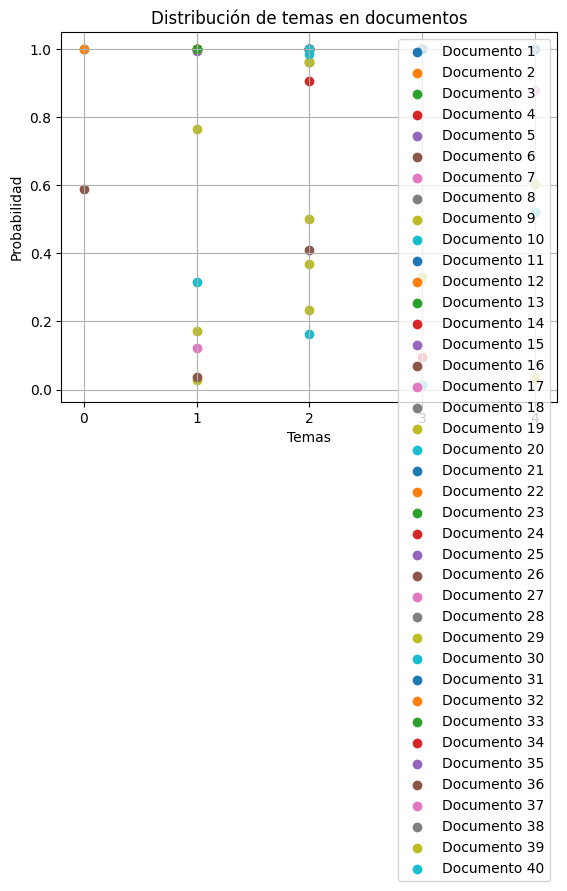

In [8]:
import matplotlib.pyplot as plt

# Obtener la distribución de temas para cada documento
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Preparar datos para la visualización
topics = [list(zip(*doc))[0] for doc in document_topics]
probabilities = [list(zip(*doc))[1] for doc in document_topics]

# Crear un gráfico de dispersión para cada documento
for i, probs in enumerate(probabilities):
    plt.scatter(topics[i], probs, label=f'Documento {i+1}')

# Etiquetas y leyenda
plt.xlabel('Temas')
plt.ylabel('Probabilidad')
plt.title('Distribución de temas en documentos')
plt.legend()
plt.xticks(range(lda_model.num_topics))
plt.grid(True)

# Mostrar el gráfico
plt.show()

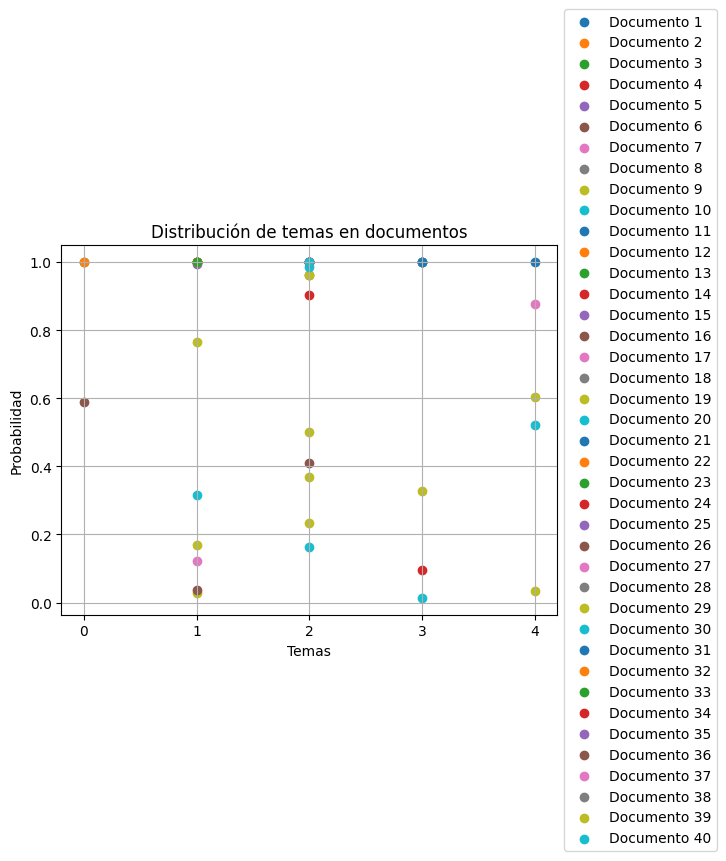

In [9]:
import matplotlib.pyplot as plt

# Obtener la distribución de temas para cada documento
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Preparar datos para la visualización
topics = [list(zip(*doc))[0] for doc in document_topics]
probabilities = [list(zip(*doc))[1] for doc in document_topics]

# Crear un gráfico de dispersión para cada documento
for i, probs in enumerate(probabilities):
    plt.scatter(topics[i], probs, label=f'Documento {i+1}')

# Etiquetas y leyenda
plt.xlabel('Temas')
plt.ylabel('Probabilidad')
plt.title('Distribución de temas en documentos')
plt.xticks(range(lda_model.num_topics))
plt.grid(True)

# Mover la leyenda fuera del área del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

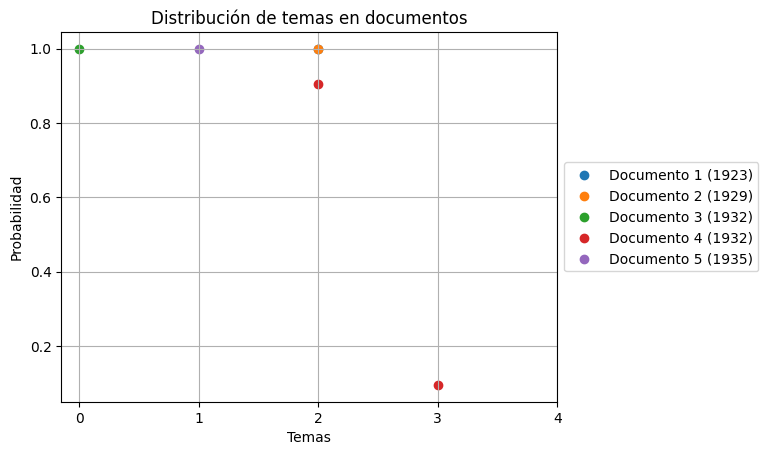

In [10]:
import matplotlib.pyplot as plt

# Obtener la distribución de temas para cada documento
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Preparar datos para la visualización
topics = [list(zip(*doc))[0] for doc in document_topics]
probabilities = [list(zip(*doc))[1] for doc in document_topics]

# Años correspondientes a los documentos
años = [1923, 1929, 1932, 1932, 1935]  # Esto debe coincidir con la longitud de document_topics

# Crear un gráfico de dispersión para cada documento
for i, (probs, año) in enumerate(zip(probabilities, años)):
    plt.scatter(topics[i], probs, label=f'Documento {i+1} ({año})')

# Etiquetas y leyenda
plt.xlabel('Temas')
plt.ylabel('Probabilidad')
plt.title('Distribución de temas en documentos')
plt.xticks(range(lda_model.num_topics))
plt.grid(True)

# Mover la leyenda fuera del área del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

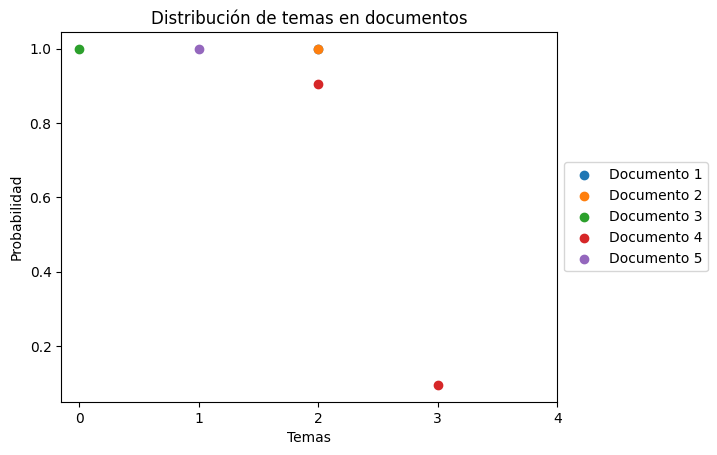

In [11]:
import matplotlib.pyplot as plt

# Obtener la distribución de temas para cada documento
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Preparar datos para la visualización
topics = [list(zip(*doc))[0] for doc in document_topics]
probabilities = [list(zip(*doc))[1] for doc in document_topics]

# Años correspondientes a los documentos
años = [1923, 1929, 1932, 1932, 1935]  # Esto debe coincidir con la longitud de document_topics

# Nombres de los documentos
nombres_documentos = datos['nombre']

# Crear un gráfico de dispersión para cada documento
for i, (probs, año) in enumerate(zip(probabilities, años)):
    plt.scatter(topics[i], probs, label=f'Documento {i+1}')

# Etiquetas y leyenda
plt.xlabel('Temas')
plt.ylabel('Probabilidad')
plt.title('Distribución de temas en documentos')
plt.xticks(range(lda_model.num_topics))

# Mover la leyenda fuera del área del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

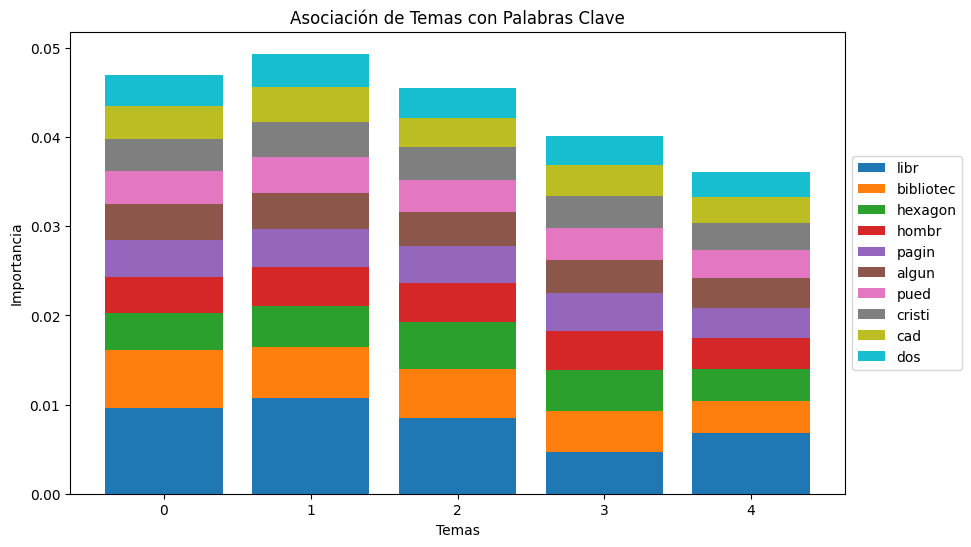

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)

# Preparar datos para la visualización
num_topics = lda_model.num_topics
num_words = 10  # número de palabras clave por tema
word_labels = [word[0] for word in topic_words[0][1]]  # lista de palabras clave
word_importance = np.zeros((num_topics, num_words))

for i, topic in enumerate(topic_words):
    for j, (word, importance) in enumerate(topic[1]):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_words):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave')
ax.set_xticks(np.arange(num_topics))

# Mostrar el gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

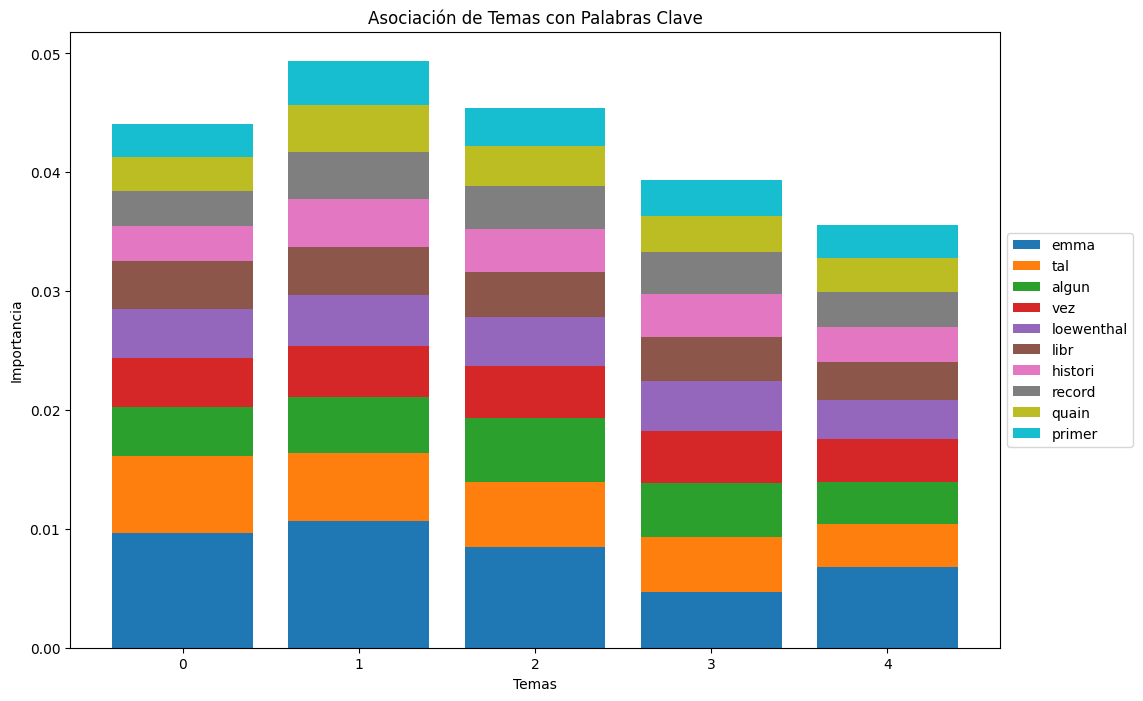

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=14)  # Incrementamos a 14 para compensar las palabras que eliminaremos
stop_words = set(['pued', 'cad', 'dos', 'cristi'])  # Palabras a eliminar

# Filtrar palabras ruido y preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = []
word_importance = np.zeros((num_topics, len(topic_words[0][1])))

for i, topic in enumerate(topic_words):
    topic_words_filtered = [(word, importance) for word, importance in topic[1] if word not in stop_words]
    word_labels = [word[0] for word in topic_words_filtered[:10]]  # Tomamos solo las 10 palabras más importantes después del filtrado
    for j, (word, importance) in enumerate(topic_words_filtered[:10]):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(word_labels)):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave')
ax.set_xticks(np.arange(num_topics))

# Mostrar el gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

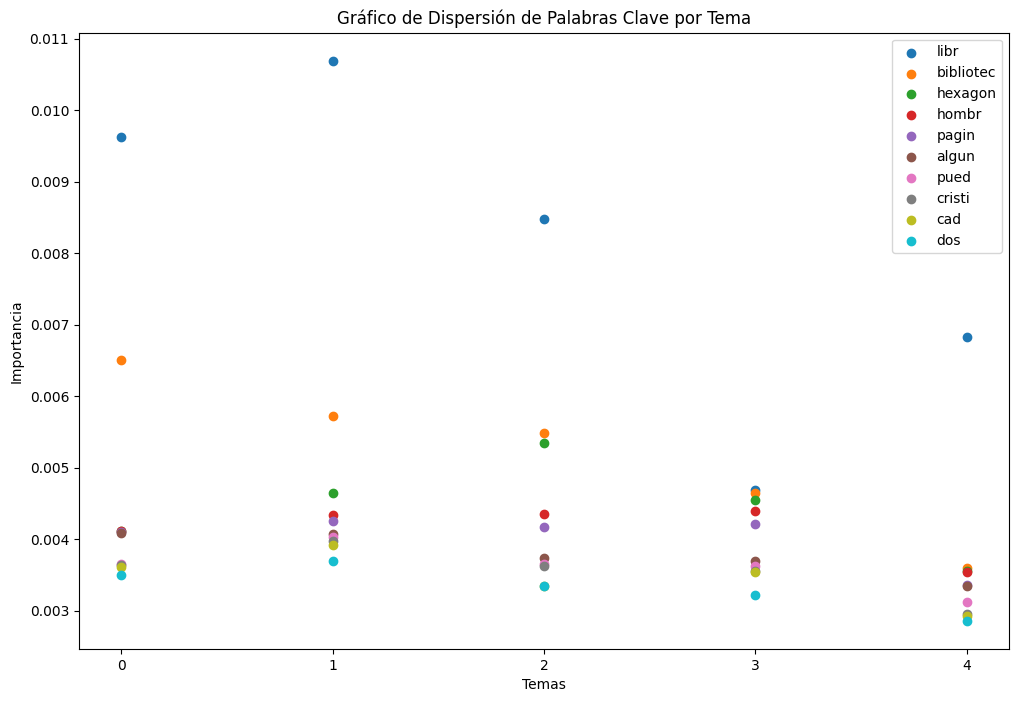

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)

# Preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = [word[0] for word in topic_words[0][1]]
word_importance = np.zeros((num_topics, len(topic_words[0][1])))

for i, topic in enumerate(topic_words):
    for j, (word, importance) in enumerate(topic[1]):
        word_importance[i, j] = importance

# Crear un gráfico de dispersión para cada tema
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(word_labels)):
    ax.scatter(np.arange(num_topics), word_importance[:, i], label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Gráfico de Dispersión de Palabras Clave por Tema')
ax.set_xticks(np.arange(num_topics))
ax.legend()

# Mostrar el gráfico
plt.show()

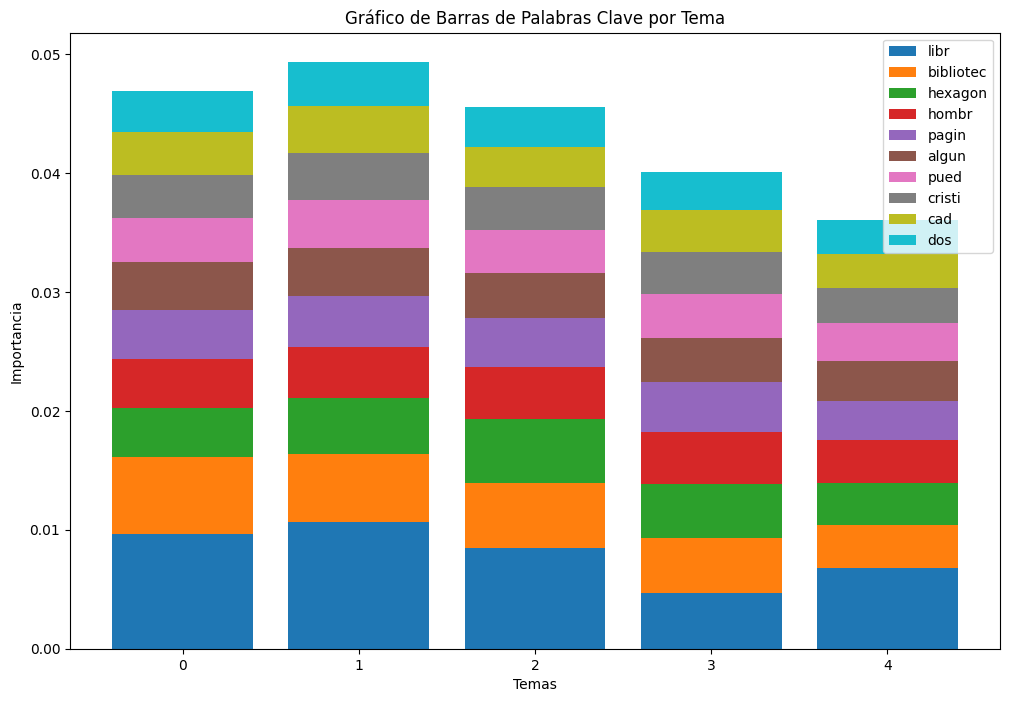

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)

# Preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = [word[0] for word in topic_words[0][1]]
word_importance = np.zeros((num_topics, len(topic_words[0][1])))

for i, topic in enumerate(topic_words):
    for j, (word, importance) in enumerate(topic[1]):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(word_labels)):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Gráfico de Barras de Palabras Clave por Tema')
ax.set_xticks(np.arange(num_topics))
ax.legend()

# Mostrar el gráfico
plt.show()

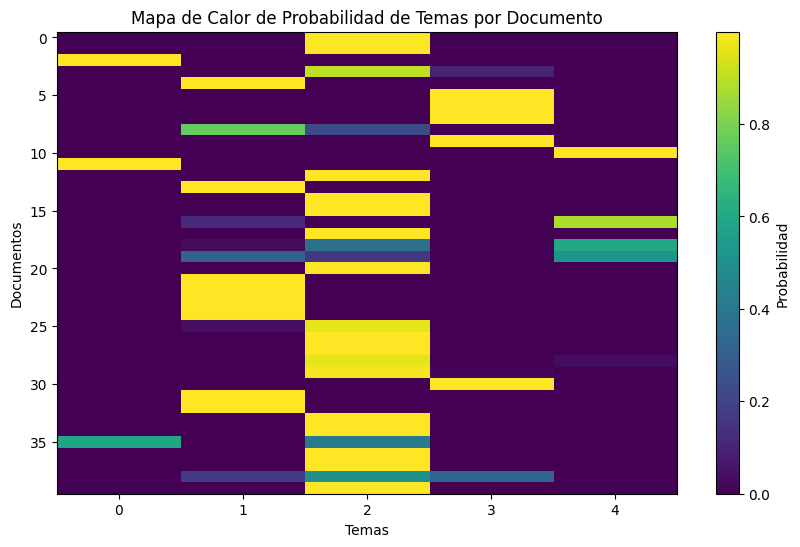

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la distribución de temas para cada documento
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Preparar datos para la visualización
num_documents = len(document_topics)
num_topics = lda_model.num_topics

# Crear una matriz de probabilidad de temas por documento
topic_probabilities = np.zeros((num_documents, num_topics))

for i, doc_topics in enumerate(document_topics):
    for topic, prob in doc_topics:
        topic_probabilities[i, topic] = prob

# Crear un mapa de calor para la probabilidad de temas por documento
plt.figure(figsize=(10, 6))
plt.imshow(topic_probabilities, cmap='viridis', aspect='auto')
plt.colorbar(label='Probabilidad')
plt.xlabel('Temas')
plt.ylabel('Documentos')
plt.title('Mapa de Calor de Probabilidad de Temas por Documento')
plt.show()

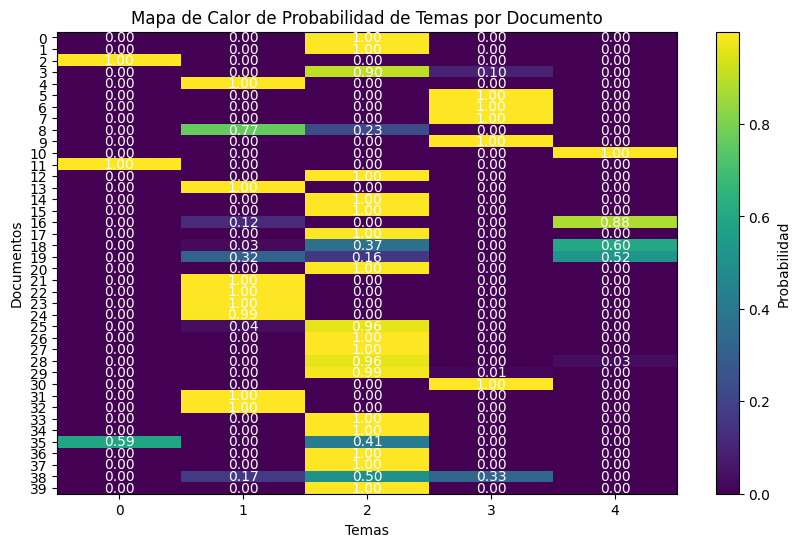

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la distribución de temas para cada documento
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Preparar datos para la visualización
num_documents = len(document_topics)
num_topics = lda_model.num_topics

# Crear una matriz de probabilidad de temas por documento
topic_probabilities = np.zeros((num_documents, num_topics))

for i, doc_topics in enumerate(document_topics):
    for topic, prob in doc_topics:
        topic_probabilities[i, topic] = prob

# Crear un mapa de calor para la probabilidad de temas por documento
plt.figure(figsize=(10, 6))
plt.imshow(topic_probabilities, cmap='viridis', aspect='auto')

# Agregar los valores de probabilidad en cada celda
for i in range(num_documents):
    for j in range(num_topics):
        plt.text(j, i, f'{topic_probabilities[i, j]:.2f}', ha='center', va='center', color='white')

plt.colorbar(label='Probabilidad')
plt.xlabel('Temas')
plt.ylabel('Documentos')
plt.title('Mapa de Calor de Probabilidad de Temas por Documento')
plt.xticks(np.arange(num_topics))
plt.yticks(np.arange(num_documents))
plt.grid(False)

plt.show()

In [18]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Lista de documentos
documentos = datos['texto']

# Preprocesamiento de texto para eliminar números y otros caracteres no deseados
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres no alfanuméricos
    return text

# Aplicar preprocesamiento de texto a cada documento
documentos_preprocesados = [preprocess_text(doc) for doc in documentos]

# Crear el objeto TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Aplicar TF-IDF al corpus preprocesado
tfidf_matrix = tfidf_vectorizer.fit_transform(documentos_preprocesados)

# Obtener los términos (palabras) del vocabulario
vocabulario = tfidf_vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un array numpy
tfidf_array = tfidf_matrix.toarray()

# Imprimir el vocabulario y la matriz TF-IDF
print("Vocabulario:", vocabulario)
print("TF-IDF Matrix:", tfidf_array)

Vocabulario: ['aarón' 'ab' 'abajo' ... 'úsala' 'útil' 'über']
TF-IDF Matrix: [[0.         0.         0.00494115 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


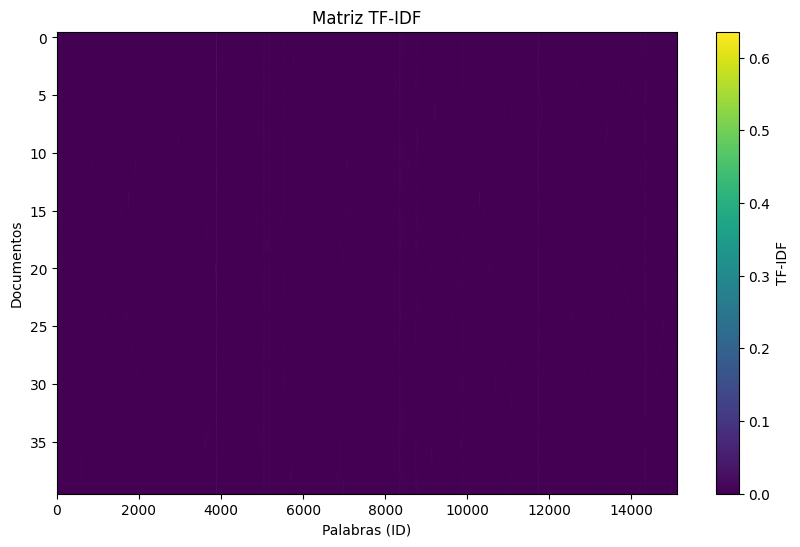

In [19]:
import matplotlib.pyplot as plt

# Visualizar la matriz TF-IDF con un mapa de calor
plt.figure(figsize=(10, 6))
plt.imshow(tfidf_array, cmap='viridis', aspect='auto')
plt.colorbar(label='TF-IDF')
plt.xlabel('Palabras (ID)')
plt.ylabel('Documentos')
plt.title('Matriz TF-IDF')
plt.show()

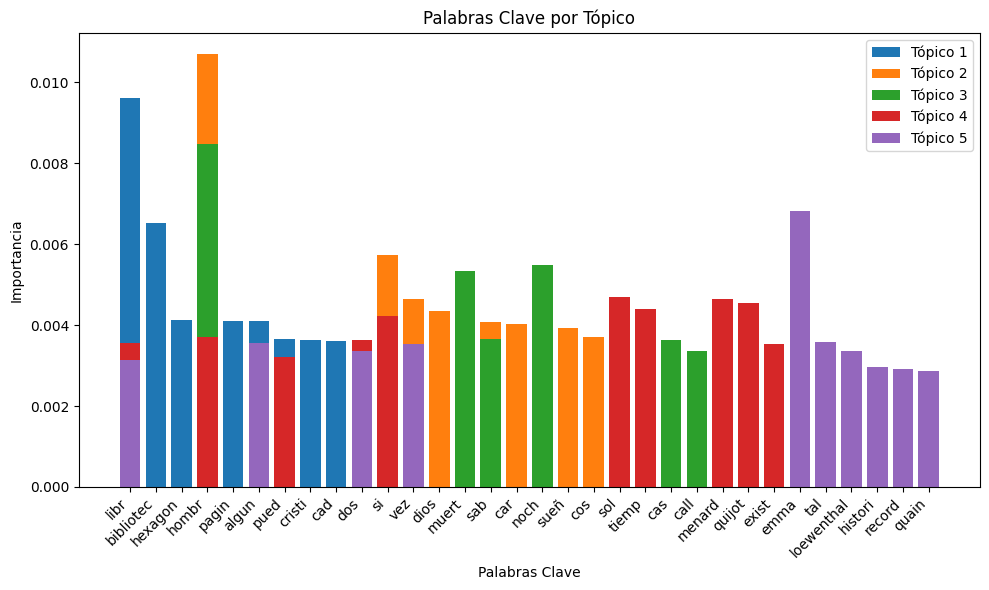

In [20]:
import matplotlib.pyplot as plt

# Obtener los tópicos y las palabras clave asociadas
topics = lda_model.show_topics(formatted=False)
num_topics = len(topics)
num_words = 10  # Número de palabras clave por tópico

# Preparar datos para la visualización
topic_labels = [f"Tópico {i+1}" for i in range(num_topics)]
word_labels = [[word[0] for word in topic[1]] for topic in topics]
word_importance = [[word[1] for word in topic[1]] for topic in topics]

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tópico
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_topics):
    ax.bar(word_labels[i], word_importance[i], label=topic_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Palabras Clave')
ax.set_ylabel('Importancia')
ax.set_title('Palabras Clave por Tópico')
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

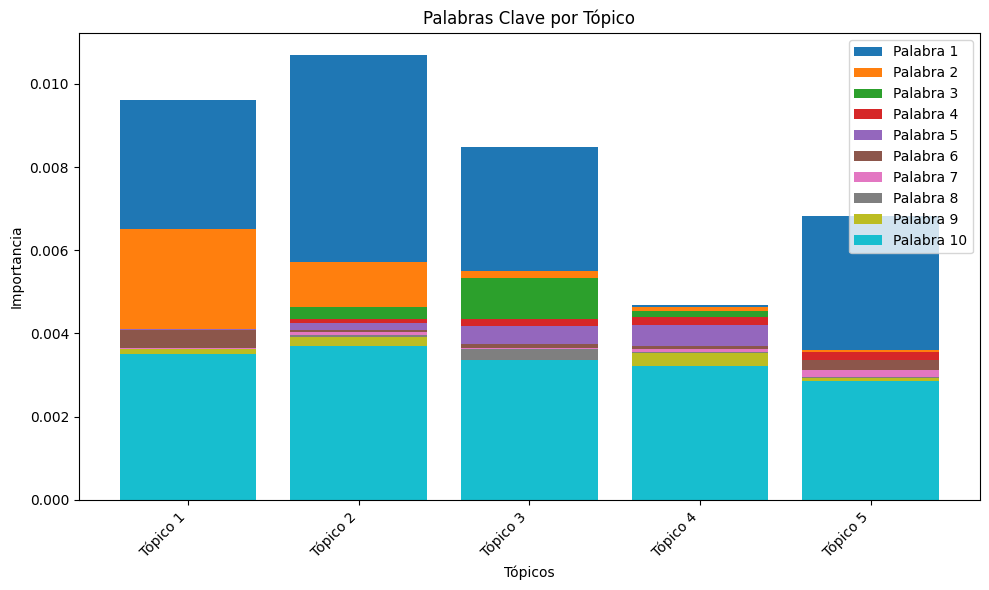

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener los tópicos y las palabras clave asociadas
topics = lda_model.show_topics(formatted=False)
num_topics = len(topics)
num_words = 10  # Número de palabras clave por tópico

# Preparar datos para la visualización
topic_labels = [f"Tópico {i+1}" for i in range(num_topics)]
word_labels = [[word[0] for word in topic[1]] for topic in topics]
word_importance = [[word[1] for word in topic[1]] for topic in topics]

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tópico
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_words):
    ax.bar(topic_labels, [importance[i] for importance in word_importance], label=f"Palabra {i+1}")

# Etiquetas y leyenda
ax.set_xlabel('Tópicos')
ax.set_ylabel('Importancia')
ax.set_title('Palabras Clave por Tópico')
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

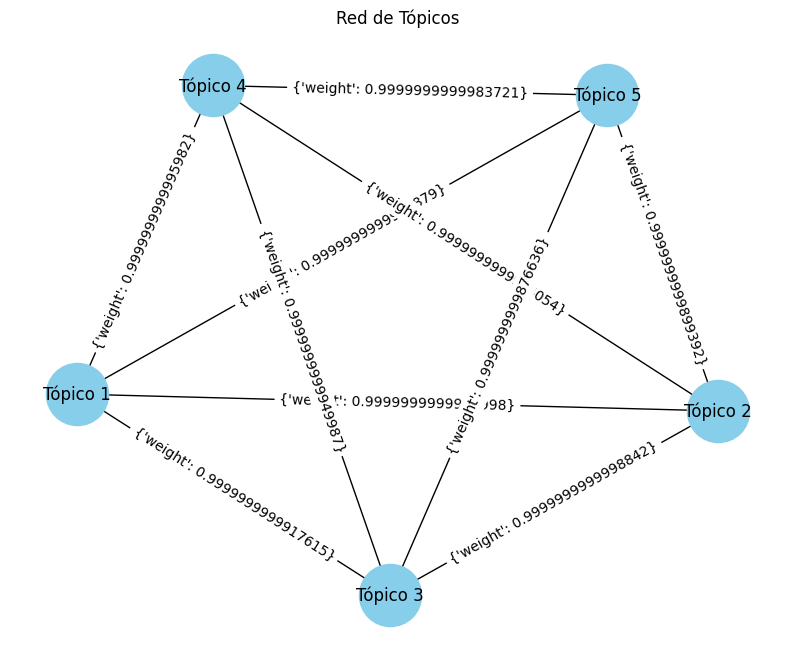

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calcular el vector promedio para cada tópico
topic_vectors = np.array([np.mean(lda_model.get_topic_terms(topic, topn=10), axis=0) for topic in range(lda_model.num_topics)])

# Calcular la similitud de coseno entre los vectores de tópicos
topic_similarities = cosine_similarity(topic_vectors)

# Crear un gráfico de red de tópicos
G = nx.Graph()

# Agregar nodos y conexiones basadas en similitud
for i in range(lda_model.num_topics):
    for j in range(i+1, lda_model.num_topics):
        similarity = topic_similarities[i][j]
        if similarity > 0.5:  # Umbral de similitud arbitrario
            G.add_edge(f'Tópico {i+1}', f'Tópico {j+1}', weight=similarity)

# Visualizar la red de tópicos
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)  # Ajustar el parámetro k para cambiar la distancia entre nodos
ax = plt.gca()  # Obtener el eje actual
nx.draw(G, pos, ax=ax, with_labels=True, node_size=2000, node_color='skyblue', font_size=12)
nx.draw_networkx_edge_labels(G, pos)
plt.title('Red de Tópicos')
plt.show()

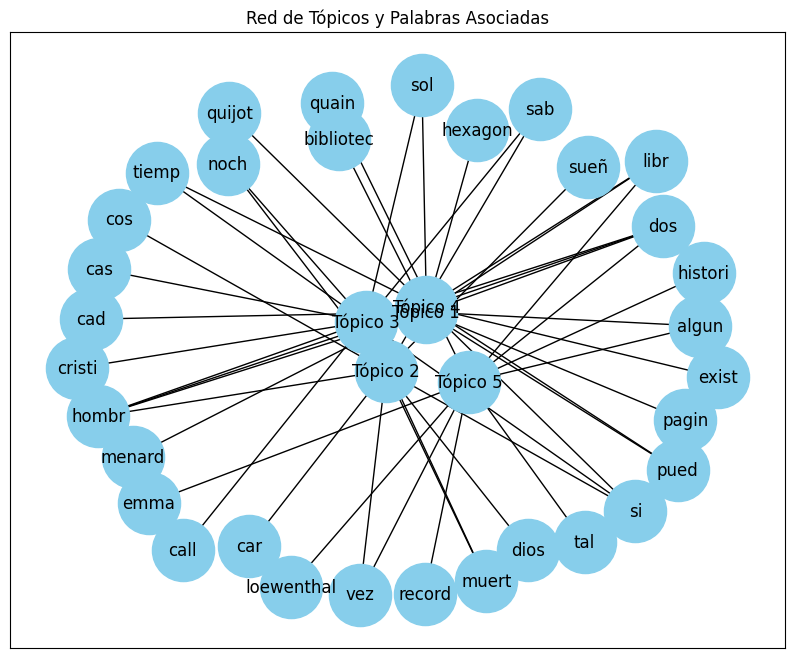

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from gensim import corpora, models

# Crear el diccionario de palabras
dictionary = corpora.Dictionary(datos['texto_preprocesado'])

# Crear el corpus
corpus = [dictionary.doc2bow(text) for text in datos['texto_preprocesado']]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Obtener las palabras clave para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos para los tópicos y las palabras
for i in range(len(topic_words)):
    G.add_node(f'Tópico {i+1}')
    for word, _ in topic_words[i][1]:
        G.add_node(word)
        G.add_edge(f'Tópico {i+1}', word)

# Visualizar la red de tópicos y palabras asociadas
plt.figure(figsize=(10, 8))  # Crear una nueva figura
pos = nx.spring_layout(G, k=0.3)  # Definir la disposición de los nodos
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, arrows=False)
plt.title('Red de Tópicos y Palabras Asociadas')
plt.show()

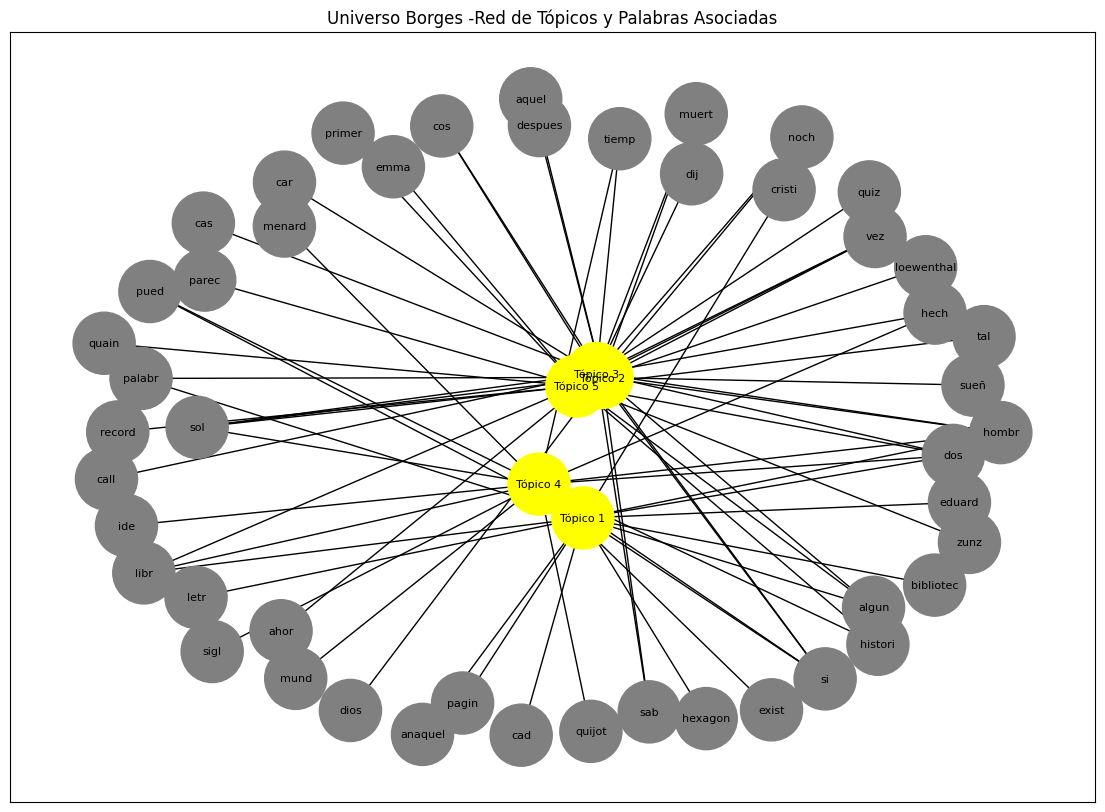

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from gensim import corpora, models

# Crear el diccionario de palabras
dictionary = corpora.Dictionary(datos['texto_preprocesado'])

# Crear el corpus
corpus = [dictionary.doc2bow(text) for text in datos['texto_preprocesado']]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Obtener las palabras clave para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=15)  # Ajustar el número de palabras asociadas aquí

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos para los tópicos y las palabras
for i in range(len(topic_words)):
    G.add_node(f'Tópico {i+1}', color='yellow')  # Cambiar el color de los nodos de los tópicos aquí
    for word, _ in topic_words[i][1]:
        G.add_node(word, color='gray')  # Asignar un color predeterminado a las palabras
        G.add_edge(f'Tópico {i+1}', word)

# Visualizar la red de tópicos y palabras asociadas
plt.figure(figsize=(14, 10))  # Crear una nueva figura con tamaño personalizado
pos = nx.spring_layout(G, k=0.3)  # Definir la disposición de los nodos
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color=[G.nodes[n].get('color', 'white') for n in G], font_size=8, arrows=False)
plt.title('Universo Borges -Red de Tópicos y Palabras Asociadas')
plt.show()

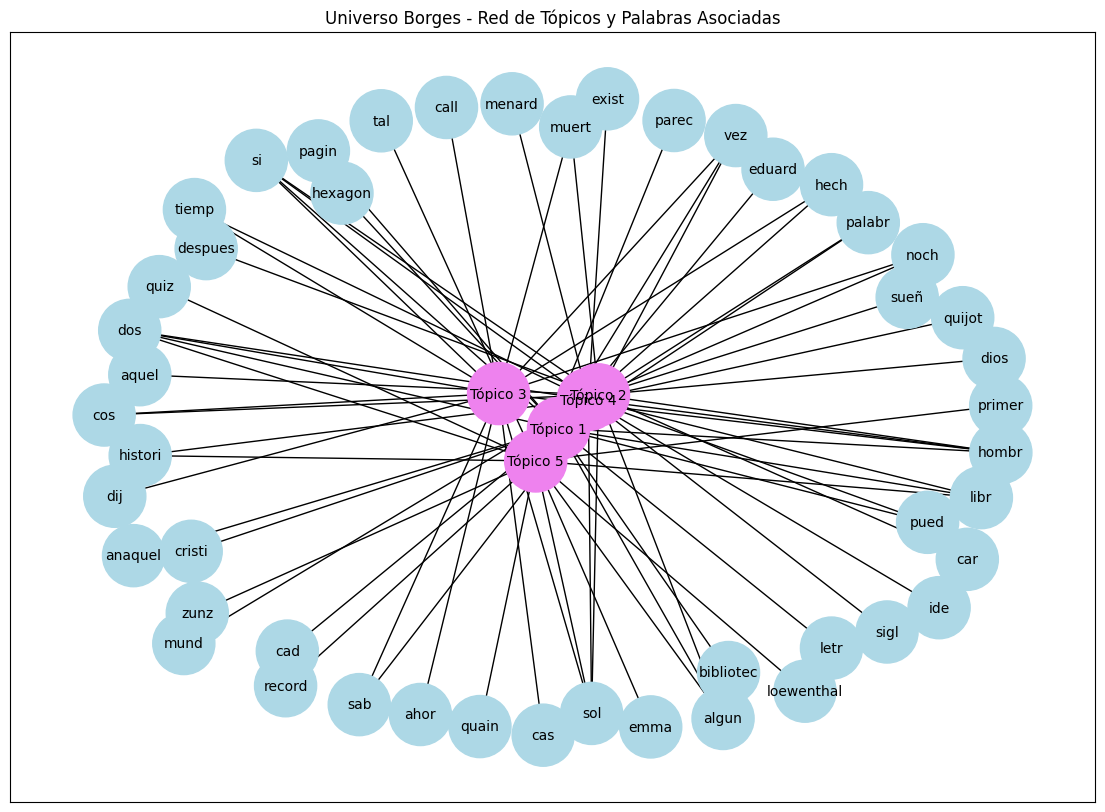

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from gensim import corpora, models

# Crear el diccionario de palabras
dictionary = corpora.Dictionary(datos['texto_preprocesado'])

# Crear el corpus
corpus = [dictionary.doc2bow(text) for text in datos['texto_preprocesado']]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Obtener las palabras clave para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=15)  # Ajustar el número de palabras asociadas aquí

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos para los tópicos y las palabras
for i in range(len(topic_words)):
    G.add_node(f'Tópico {i+1}', color='violet')  # Cambiar el color de los nodos de los tópicos aquí
    for word, _ in topic_words[i][1]:
        G.add_node(word, color='lightblue')  # Asignar un color predeterminado a las palabras
        G.add_edge(f'Tópico {i+1}', word)

# Visualizar la red de tópicos y palabras asociadas
plt.figure(figsize=(14, 10))  # Crear una nueva figura con tamaño personalizado
pos = nx.spring_layout(G, k=0.3)  # Definir la disposición de los nodos
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color=[G.nodes[n].get('color', 'white') for n in G], font_size=10, arrows=False)
plt.title('Universo Borges - Red de Tópicos y Palabras Asociadas')
plt.show()

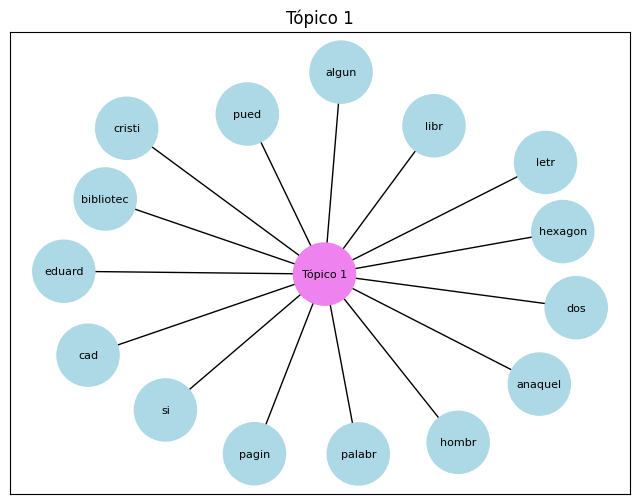

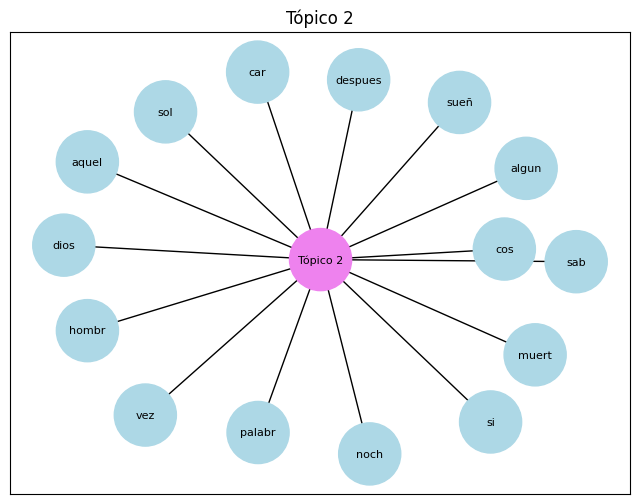

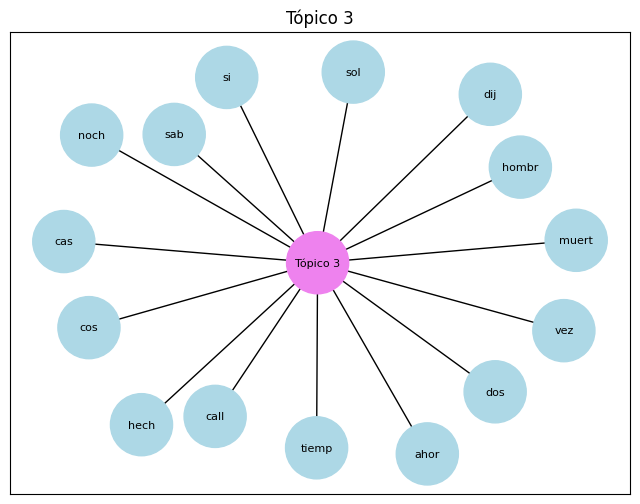

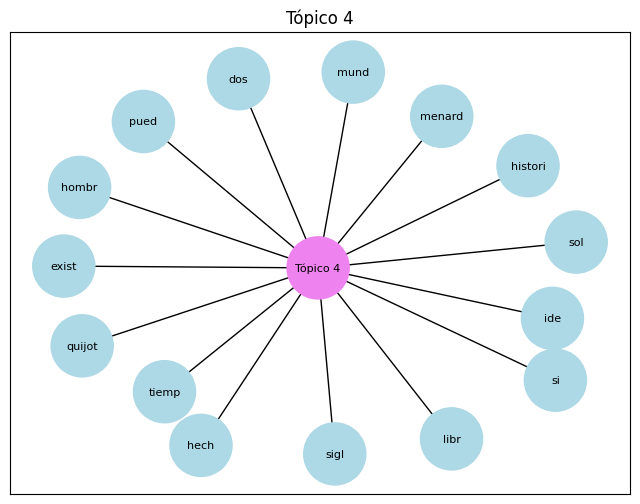

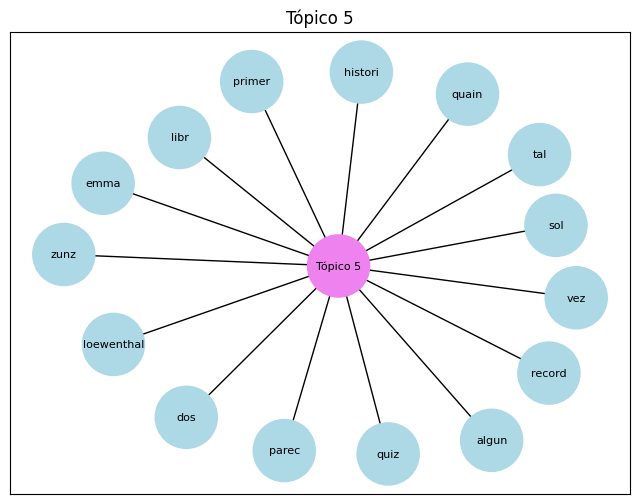

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Obtener las palabras clave para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=15)  # Ajustar el número de palabras asociadas aquí

# Crear y visualizar un grafo para cada tópico
for i, (topic, words) in enumerate(topic_words, start=1):
    # Crear un grafo dirigido
    G = nx.DiGraph()
    G.add_node(f'Tópico {i}', color='violet')  # Nodo del tópico con color violeta
    
    # Agregar nodos para las palabras y las conexiones con el tópico
    for word, _ in words:
        G.add_node(word, color='lightblue')  # Nodos de las palabras con color azul claro
        G.add_edge(f'Tópico {i}', word)
    
    # Visualizar el grafo del tópico
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, k=0.3)  # Definir la disposición de los nodos
    nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color=[G.nodes[n].get('color', 'white') for n in G], font_size=8, arrows=False)
    plt.title(f'Tópico {i}')
    plt.show()

In [27]:
!pip install networkx

In [29]:
import plotly.graph_objects as go
import networkx as nx
from gensim import corpora, models

# Crear el diccionario de palabras
dictionary = corpora.Dictionary(datos['texto_preprocesado'])

# Crear el corpus
corpus = [dictionary.doc2bow(text) for text in datos['texto_preprocesado']]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Obtener las palabras clave para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=15)  # Ajustar el número de palabras asociadas aquí

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos para los tópicos y las palabras
for i in range(len(topic_words)):
    G.add_node(f'Tópico {i+1}', color='violet')  # Cambiar el color de los nodos de los tópicos aquí
    for word, _ in topic_words[i][1]:
        G.add_node(word, color='lightblue')  # Asignar un color predeterminado a las palabras
        G.add_edge(f'Tópico {i+1}', word)

# Definir el trazado del grafo
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text = []
node_colors = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_colors.append(G.nodes[node]['color'])

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='Blues',
        reversescale=True,
        color=node_colors,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Crear la figura
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Red de Tópicos y Palabras Asociadas',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Mostrar la figura
fig.show()

KeyError: 'Tópico 1'

In [30]:
import plotly.graph_objs as go
import numpy as np

# Crear la figura
fig = go.Figure()

# Añadir la traza de las aristas
fig.add_trace(go.Scatter(x=[],
                         y=[],
                         mode='lines',
                         line=dict(color='black', width=1),
                         hoverinfo='none',
                         name='Conexiones'))

# Añadir la traza de los nodos
fig.add_trace(go.Scatter(x=[],
                         y=[],
                         mode='markers+text',
                         hoverinfo='text',
                         text=[],
                         marker=dict(color='blue', size=10),
                         name='Nodos'))

# Definir el layout
fig.update_layout(title='Red de Tópicos y Palabras Asociadas',
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Añadir los datos a la figura
for frame_data in frames:
    fig.data[1].x = [pos[node][0] for node in G.nodes()]
    fig.data[1].y = [pos[node][1] for node in G.nodes()]
    fig.data[1].text = [node for node in G.nodes()]
    fig.data[1].marker.color = [G.nodes[node]['color'] for node in G.nodes()]

# Ajustar el tamaño de la figura
fig.update_layout(width=800, height=600)

# Visualizar la figura
fig.show()

NameError: name 'frames' is not defined

In [102]:
import plotly.graph_objs as go
import numpy as np

# Función para rotar las posiciones de los nodos
def rotate_positions(pos, angle):
    new_pos = {}
    for node, (x, y) in pos.items():
        new_x = x * np.cos(angle) - y * np.sin(angle)
        new_y = x * np.sin(angle) + y * np.cos(angle)
        new_pos[node] = (new_x, new_y)
    return new_pos

# Crear la figura
fig = go.Figure()

# Añadir la traza de las aristas
fig.add_trace(go.Scatter(x=[],
                         y=[],
                         mode='lines',
                         line=dict(color='black', width=1),
                         hoverinfo='none',
                         name='Conexiones'))

# Añadir la traza de los nodos
fig.add_trace(go.Scatter(x=[],
                         y=[],
                         mode='markers+text',
                         hoverinfo='text',
                         text=[],
                         marker=dict(color='blue', size=10),
                         name='Nodos'))

# Definir el layout
fig.update_layout(title='Red de Tópicos y Palabras Asociadas',
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Crear fotogramas para la animación
frames = []

# Añadir los datos iniciales al primer fotograma
frame = go.Frame(data=[go.Scatter(x=[],
                                  y=[],
                                  mode='markers+text',
                                  hoverinfo='text',
                                  text=[],
                                  marker=dict(color='blue', size=10))])
frames.append(frame)

# Añadir los datos de movimiento a los fotogramas
pos = nx.spring_layout(G, k=0.3)
for i in range(1, 360, 10):  # Generar 36 fotogramas para rotar 360 grados
    # Calcular las nuevas posiciones de los nodos (rotación)
    new_pos = rotate_positions(pos, np.radians(i))
    
    # Crear un nuevo fotograma con las posiciones actualizadas
    frame = go.Frame(data=[go.Scatter(x=[new_pos[node][0] for node in G.nodes()],
                                      y=[new_pos[node][1] for node in G.nodes()],
                                      mode='markers+text',
                                      hoverinfo='text',
                                      text=[node for node in G.nodes()],
                                      marker=dict(color=[G.nodes[node]['color'] for node in G.nodes()], size=10))])
    
    # Añadir el fotograma a la lista de fotogramas
    frames.append(frame)

# Añadir los fotogramas a la figura y definir la duración de la animación
fig.frames = frames
fig.layout.updatemenus = [dict(type='buttons',
                                showactive=False,
                                buttons=[dict(label='Reproducir',
                                              method='animate',
                                              args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)])])]
# Ajustar el tamaño de la figura
fig.update_layout(width=800, height=600)

# Visualizar la figura
fig.show()


In [31]:
import plotly.graph_objs as go
import numpy as np
import networkx as nx

# Función para rotar las posiciones de los nodos
def rotate_positions(pos, angle):
    new_pos = {}
    for node, (x, y) in pos.items():
        new_x = x * np.cos(angle) - y * np.sin(angle)
        new_y = x * np.sin(angle) + y * np.cos(angle)
        new_pos[node] = (new_x, new_y)
    return new_pos

# Crear el grafo dirigido
G = nx.DiGraph()

# Agregar nodos y aristas al grafo
G.add_nodes_from(['Tópico 1', 'Tópico 2', 'Tópico 3', 'Palabra 1', 'Palabra 2', 'Palabra 3'])
G.add_edges_from([('Tópico 1', 'Palabra 1'), ('Tópico 2', 'Palabra 2'), ('Tópico 3', 'Palabra 3')])

# Calcular la disposición inicial de los nodos
pos = nx.spring_layout(G, seed=42)

# Crear la figura
fig = go.Figure()

# Añadir traza de aristas
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    fig.add_trace(go.Scatter(x=[x0, x1], y=[y0, y1], mode='lines', line=dict(color='black')))

# Añadir traza de nodos
for node in G.nodes():
    x, y = pos[node]
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers+text', text=node, marker=dict(size=15)))

# Definir fotogramas de la animación
frames = []
for i in range(0, 360, 1):
    new_pos = rotate_positions(pos, np.radians(i))
    data = []
    for node in G.nodes():
        x, y = new_pos[node]
        data.append(go.Scatter(x=[x], y=[y], mode='markers+text', text=node, marker=dict(size=15)))
    frames.append(go.Frame(data=data))

# Añadir fotogramas a la figura
fig.frames = frames

# Configurar reproducción de la animación
fig.update_layout(updatemenus=[dict(type='buttons', buttons=[dict(label='Play', method='animate', args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)])])])

# Ajustar tamaño de la figura
fig.update_layout(width=800, height=600)

# Mostrar figura
fig.show()

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go

# Función para rotar las posiciones de los nodos
def rotate_positions(pos, angle):
    new_pos = {}
    for node, (x, y) in pos.items():
        new_x = x * np.cos(angle) - y * np.sin(angle)
        new_y = x * np.sin(angle) + y * np.cos(angle)
        new_pos[node] = (new_x, new_y)
    return new_pos

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos para los tópicos y las palabras
G.add_nodes_from(['Tópico 1', 'Tópico 2', 'Tópico 3', 'Palabra 1', 'Palabra 2', 'Palabra 3'])

# Añadir relaciones entre tópicos y palabras
G.add_edges_from([('Tópico 1', 'Palabra 1'), ('Tópico 2', 'Palabra 2'), ('Tópico 3', 'Palabra 3')])

# Asignar un color predeterminado a todos los nodos
default_color = 'blue'
for node in G.nodes:
    G.nodes[node]['color'] = default_color

# Crear la figura
fig = go.Figure()

# Añadir la traza de las aristas
edge_trace = go.Scatter(x=[],
                        y=[],
                        mode='lines',
                        line=dict(color='black', width=1),
                        hoverinfo='none',
                        name='Conexiones')
fig.add_trace(edge_trace)

# Añadir la traza de los nodos
node_trace = go.Scatter(x=[],
                        y=[],
                        mode='markers+text',
                        hoverinfo='text',
                        text=[],
                        marker=dict(color=default_color, size=10),
                        name='Nodos')
fig.add_trace(node_trace)

# Definir el layout
fig.update_layout(title='Red de Tópicos y Palabras Asociadas',
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Crear fotogramas para la animación
frames = []

# Añadir los datos iniciales al primer fotograma
pos = nx.spring_layout(G, k=0.3)
frame = go.Frame(data=[go.Scatter(x=[pos[node][0] for node in G.nodes()],
                                  y=[pos[node][1] for node in G.nodes()],
                                  mode='markers+text',
                                  hoverinfo='text',
                                  text=[node for node in G.nodes()],
                                  marker=dict(color=default_color, size=10))])
frames.append(frame)

# Añadir los datos de movimiento a los fotogramas
for i in range(1, 360, 10):  # Generar 36 fotogramas para rotar 360 grados
    # Calcular las nuevas posiciones de los nodos (rotación)
    new_pos = rotate_positions(pos, np.radians(i))
    
    # Crear un nuevo fotograma con las posiciones actualizadas
    frame = go.Frame(data=[go.Scatter(x=[new_pos[node][0] for node in G.nodes()],
                                      y=[new_pos[node][1] for node in G.nodes()],
                                      mode='markers+text',
                                      hoverinfo='text',
                                      text=[node for node in G.nodes()],
                                      marker=dict(color=[G.nodes[node]['color'] for node in G.nodes()], size=10))])
    
    # Añadir el fotograma a la lista de fotogramas
    frames.append(frame)

# Añadir los fotogramas a la figura y definir la duración de la animación
fig.frames = frames
fig.layout.updatemenus = [dict(type='buttons',
                                showactive=False,
                                buttons=[dict(label='Reproducir',
                                              method='animate',
                                              args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)])])]
# Ajustar el tamaño de la figura
fig.update_layout(width=800, height=600)

# Visualizar la figura
fig.show()

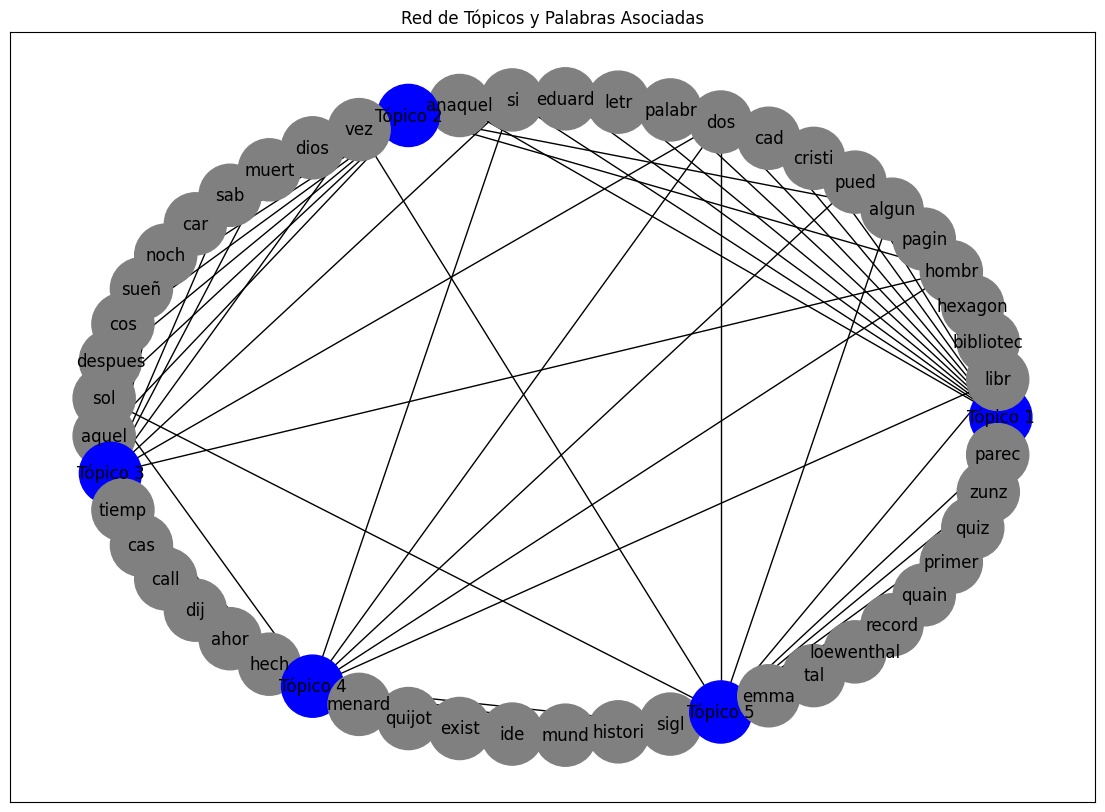

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
from gensim import corpora, models

# Crear el diccionario de palabras
dictionary = corpora.Dictionary(datos['texto_preprocesado'])

# Crear el corpus
corpus = [dictionary.doc2bow(text) for text in datos['texto_preprocesado']]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Obtener las palabras clave para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=15)  # Ajustar el número de palabras asociadas aquí

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos para los tópicos y las palabras
for i in range(len(topic_words)):
    G.add_node(f'Tópico {i+1}', color='blue')  # Cambiar el color de los nodos de los tópicos aquí
    for word, _ in topic_words[i][1]:
        G.add_node(word, color='gray')  # Asignar un color predeterminado a las palabras
        G.add_edge(f'Tópico {i+1}', word)

# Crear un diseño circular para colocar los tópicos en el borde exterior
pos = nx.circular_layout(G)

# Visualizar la red de tópicos y palabras asociadas
plt.figure(figsize=(14, 10))  # Crear una nueva figura con tamaño personalizado
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color=[G.nodes[n].get('color', 'gray') for n in G], font_size=12, arrows=False)
plt.title('Red de Tópicos y Palabras Asociadas')
plt.show()

NetworkXError: Node 'libr' has no position.

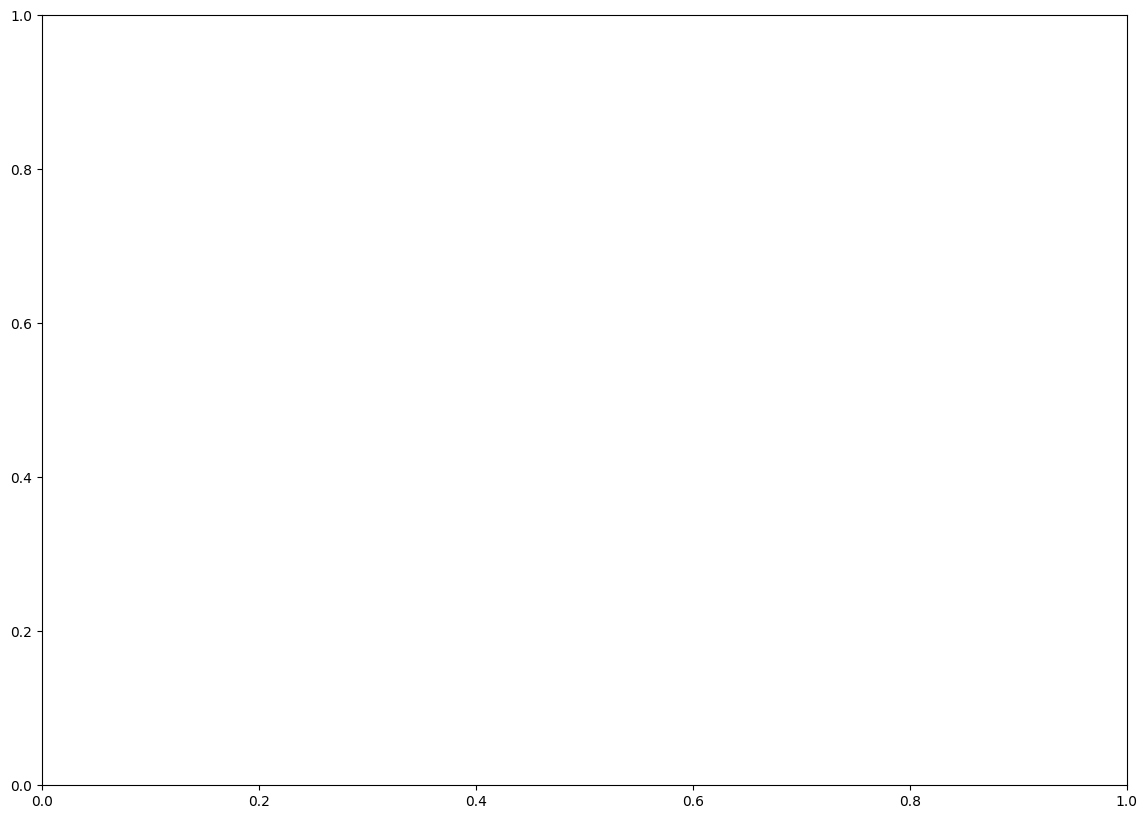

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from gensim import corpora, models

# Crear el diccionario de palabras
dictionary = corpora.Dictionary(datos['texto_preprocesado'])

# Crear el corpus
corpus = [dictionary.doc2bow(text) for text in datos['texto_preprocesado']]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Obtener las palabras clave para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)  # Ajustar el número de palabras asociadas aquí

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos para los tópicos y las palabras
for i in range(len(topic_words)):
    G.add_node(f'Tópico {i+1}', color='blue')  # Cambiar el color de los nodos de los tópicos aquí

# Crear un diseño circular para colocar los tópicos en el borde exterior
pos = nx.circular_layout(G)

# Ajustar las posiciones de los nodos de los tópicos para que estén en el borde exterior
for node, (x, y) in pos.items():
    if 'Tópico' in node:
        r = max(abs(x), abs(y))
        pos[node] = (x / r, y / r)

# Agregar nodos de palabras
for i, topic in enumerate(topic_words):
    for word, _ in topic[1]:
        G.add_node(word, color='gray')  # Asignar un color predeterminado a las palabras
        G.add_edge(f'Tópico {i+1}', word)

# Visualizar la red de tópicos y palabras asociadas
plt.figure(figsize=(14, 10))  # Crear una nueva figura con tamaño personalizado
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color=[G.nodes[n].get('color', 'gray') for n in G], font_size=12, arrows=False)
plt.title('Red de Tópicos y Palabras Asociadas')
plt.show()

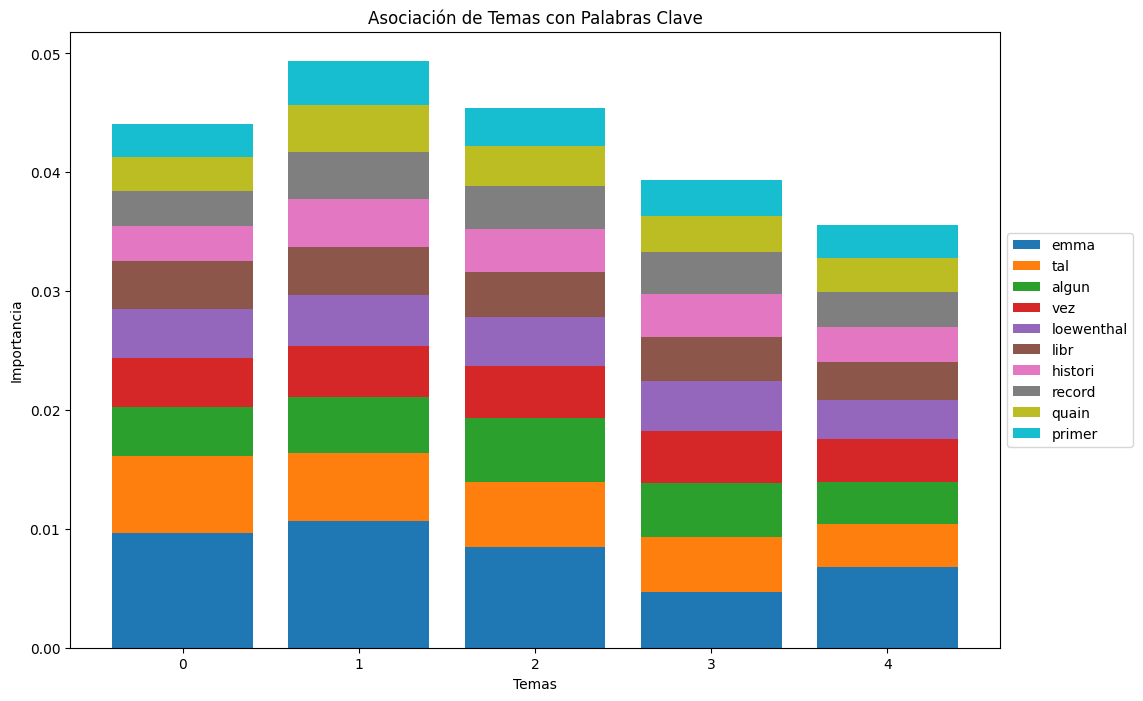

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=14)  # Incrementamos a 14 para compensar las palabras que eliminaremos
stop_words = set(['pued', 'cad', 'dos', 'cristi'])  # Palabras a eliminar

# Filtrar palabras ruido y preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = []
word_importance = np.zeros((num_topics, len(topic_words[0][1])))

for i, topic in enumerate(topic_words):
    topic_words_filtered = [(word, importance) for word, importance in topic[1] if word not in stop_words]
    word_labels = [word[0] for word in topic_words_filtered[:10]]  # Tomamos solo las 10 palabras más importantes después del filtrado
    for j, (word, importance) in enumerate(topic_words_filtered[:10]):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(word_labels)):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave')
ax.set_xticks(np.arange(num_topics))

# Mostrar el gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un gráfico de red
G = nx.Graph()

# Agregar nodos y conexiones basados en co-ocurrencias significativas
for i in range(num_topics):
    for j in range(num_words):
        G.add_node(word_labels[i][j])
        for k in range(j+1, num_words):
            G.add_edge(word_labels[i][j], word_labels[i][k])

# Visualizar la red de palabras
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=2000, node_color='skyblue', with_labels=True)
plt.title('Red de Palabras por Co-ocurrencia en Documentos del Mismo Tema')
plt.show()

IndexError: string index out of range

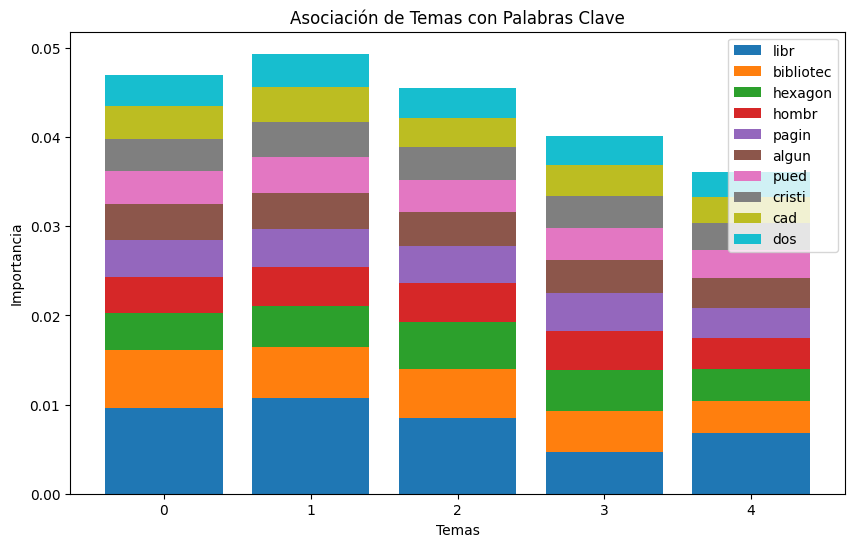

In [37]:
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)
#stop_words = set(['pued', 'cad', 'dos', 'as', 'hac', 'ser', 'est', 'par', 'sin', 'tien', 'emma'])  # Lista de palabras ruido


# Preparar datos para la visualización
num_topics = lda_model.num_topics
num_words = 10  # número de palabras clave por tema
word_labels = [word[0] for word in topic_words[0][1]]  # lista de palabras clave
word_importance = np.zeros((num_topics, num_words))

for i, topic in enumerate(topic_words):
    for j, (word, importance) in enumerate(topic[1]):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_words):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave')
ax.set_xticks(np.arange(num_topics))
ax.legend()

# Mostrar el gráfico
plt.show()

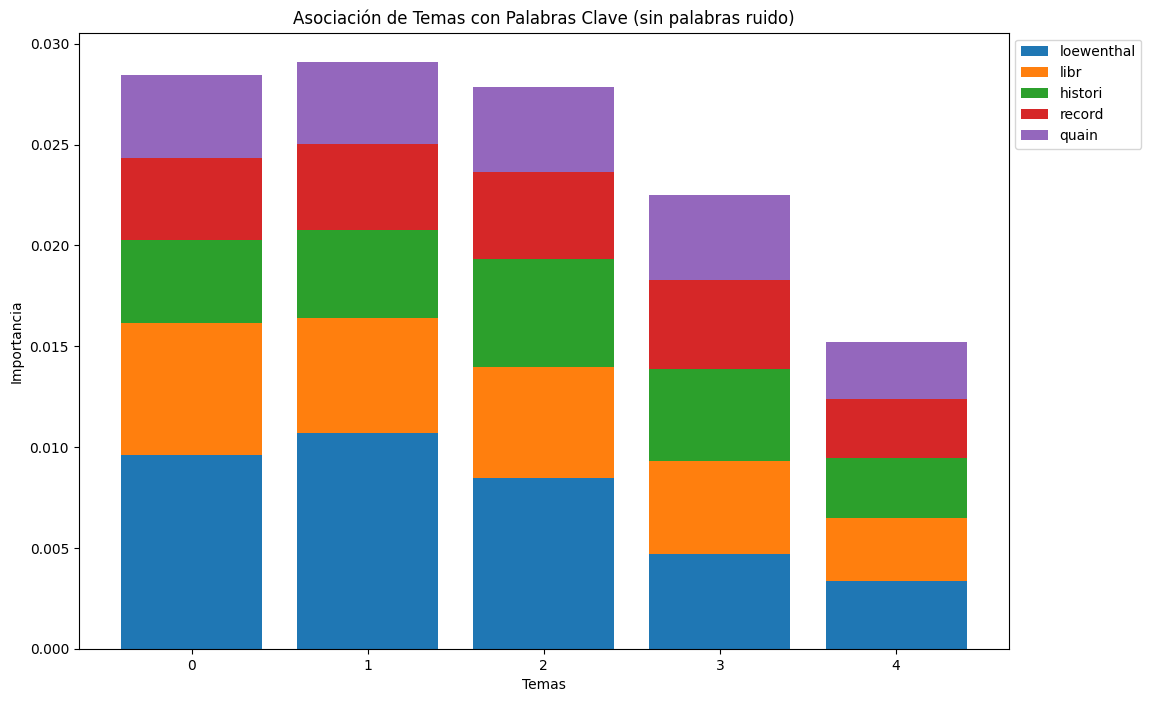

In [38]:
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)
stop_words = set(['pued', 'cad', 'dos', 'as', 'hac', 'ser', 'est', 'par', 'sin', 'tien', 'emma', 'algun', 'pued', 'cristi', 'tal', 'vez'])  # Lista de palabras ruido

# Preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = []
word_importance = np.zeros((num_topics, 10))  # Solo mostraremos las 10 palabras más importantes

for i, topic in enumerate(topic_words):
    topic_words_filtered = [(word, importance) for word, importance in topic[1] if word not in stop_words][:10]
    word_labels = [word[0] for word in topic_words_filtered]
    for j, (word, importance) in enumerate(topic_words_filtered):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(word_labels)):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave (sin palabras ruido)')
ax.set_xticks(np.arange(num_topics))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

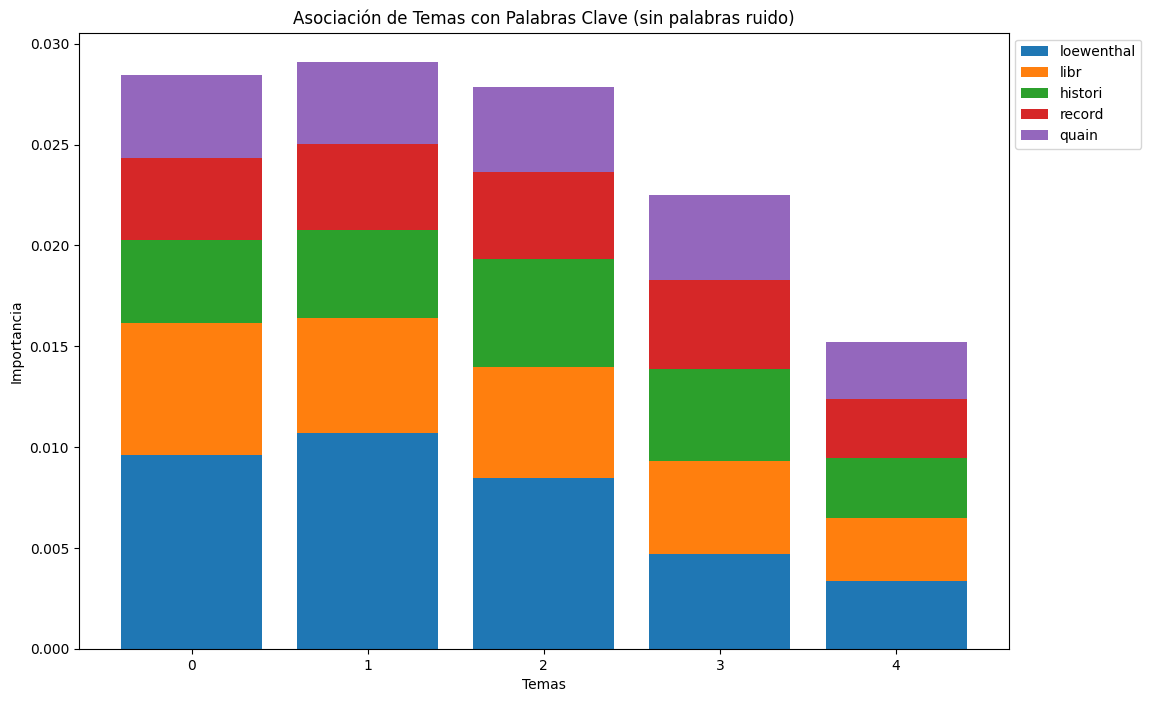

In [39]:
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)
stop_words = set(['pued', 'cad', 'dos', 'as', 'hac', 'ser', 'est', 'par', 'sin', 'tien', 'emma', 'algun', 'pued', 'cristi', 'tal', 'vez'])  # Lista de palabras ruido

# Preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = []
word_importance = np.zeros((num_topics, 10))  # Solo mostraremos las 10 palabras más importantes

for i, topic in enumerate(topic_words):
    filtered_words = [(word, importance) for word, importance in topic[1] if word not in stop_words]
    top_words = filtered_words[:10] if len(filtered_words) >= 10 else filtered_words  # Tomar hasta 10 palabras, si están disponibles
    word_labels = [word[0] for word in top_words]
    for j, (word, importance) in enumerate(top_words):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(word_labels)):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave (sin palabras ruido)')
ax.set_xticks(np.arange(num_topics))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

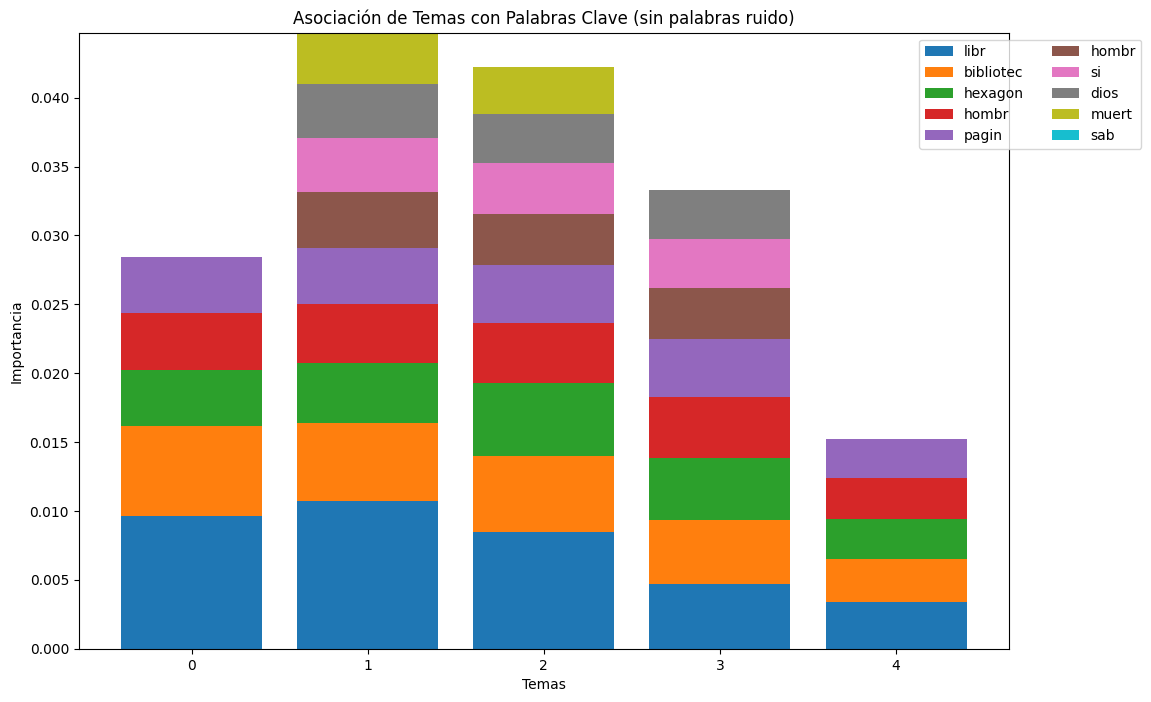

In [40]:
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)
stop_words = set(['pued', 'cad', 'dos', 'as', 'hac', 'ser', 'est', 'par', 'sin', 'tien', 'emma', 'algun', 'pued', 'cristi', 'tal', 'vez'])  # Lista de palabras ruido

# Preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = []
word_importance = np.zeros((num_topics, 10))  # Solo mostraremos las 10 palabras más importantes

for i, topic in enumerate(topic_words):
    filtered_words = [(word, importance) for word, importance in topic[1] if word not in stop_words]
    filtered_words = filtered_words[:10]  # Tomar hasta 10 palabras
    word_labels.extend([word for word, _ in filtered_words])
    for j, (_, importance) in enumerate(filtered_words):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(min(10, len(word_labels))):  # Asegurar que solo iteramos hasta el mínimo entre 10 y la longitud de las etiquetas
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave (sin palabras ruido)')
ax.set_xticks(np.arange(num_topics))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2)

# Mostrar el gráfico
plt.show()

IndexError: index 10 is out of bounds for axis 1 with size 10

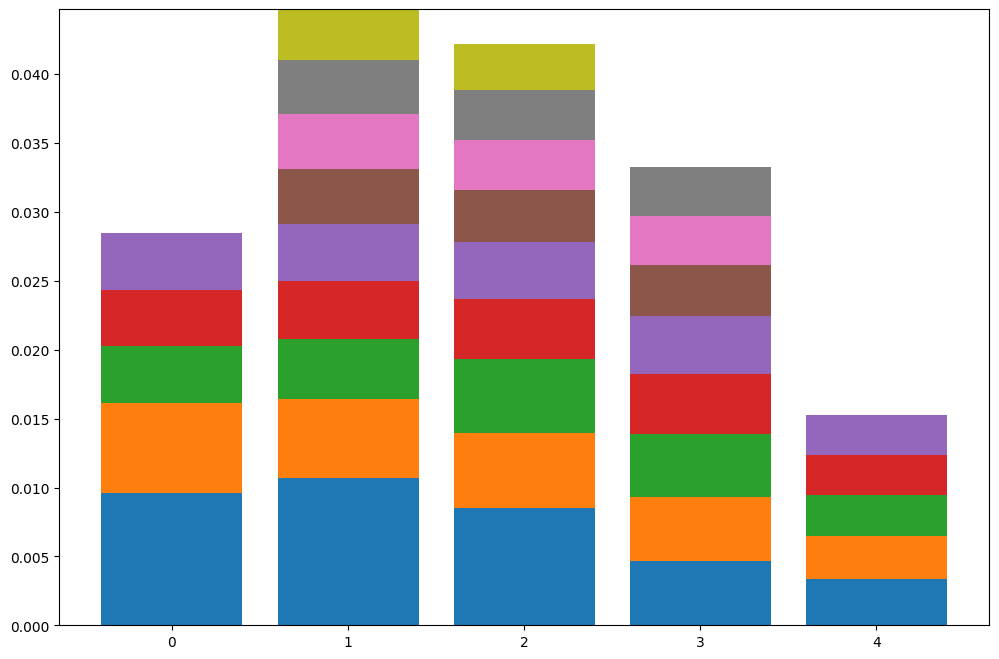

In [41]:
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)
stop_words = set(['pued', 'cad', 'dos', 'as', 'hac', 'ser', 'est', 'par', 'sin', 'tien', 'emma', 'algun', 'pued', 'cristi', 'tal', 'vez'])  # Lista de palabras ruido

# Preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = set()  # Usamos un conjunto para evitar repeticiones
word_importance = np.zeros((num_topics, 10))  # Solo mostraremos las 10 palabras más importantes

for i, topic in enumerate(topic_words):
    filtered_words = [(word, importance) for word, importance in topic[1] if word not in stop_words]
    filtered_words = filtered_words[:10]  # Tomar hasta 10 palabras
    for j, (word, importance) in enumerate(filtered_words):
        word_labels.add(word)
        word_importance[i, j] = importance

# Convertimos el conjunto a una lista para mantener el orden original
word_labels = list(word_labels)

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i, word in enumerate(word_labels):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word)

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave (sin palabras ruido)')
ax.set_xticks(np.arange(num_topics))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2)

# Mostrar el gráfico
plt.show()

IndexError: index 10 is out of bounds for axis 1 with size 10

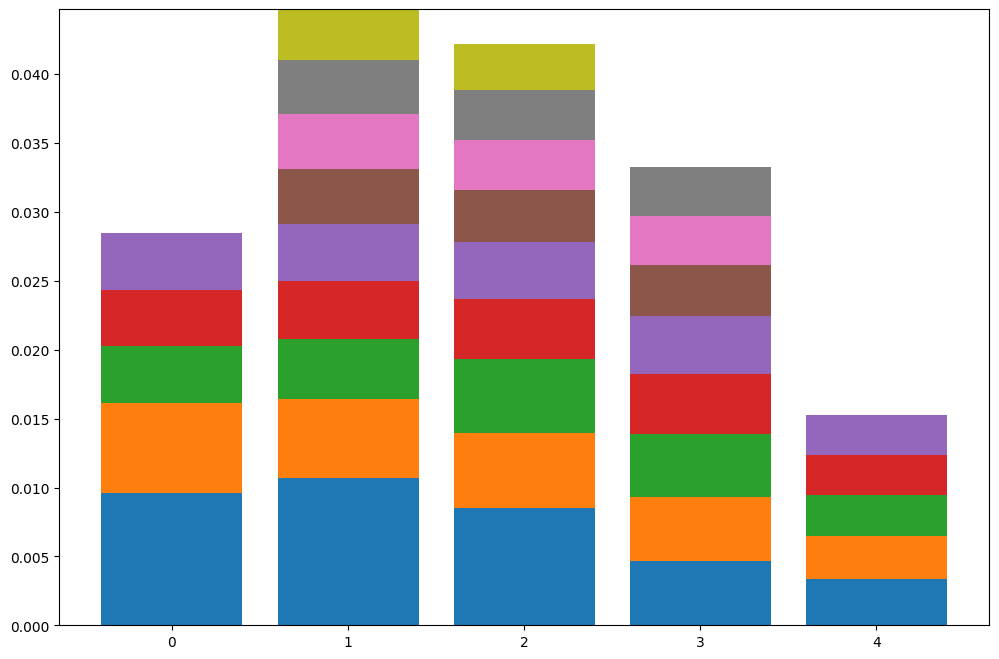

In [26]:
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)
stop_words = set(['pued', 'cad', 'dos', 'as', 'hac', 'ser', 'est', 'par', 'sin', 'tien', 'emma', 'algun', 'pued', 'cristi', 'tal', 'vez'])  # Lista de palabras ruido

# Preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = set()  # Usamos un conjunto para evitar repeticiones
word_importance = np.zeros((num_topics, 10))  # Solo mostraremos las 10 palabras más importantes

for i, topic in enumerate(topic_words):
    filtered_words = [(word, importance) for word, importance in topic[1] if word not in stop_words]
    filtered_words = filtered_words[:10]  # Tomar hasta 10 palabras
    for j, (word, importance) in enumerate(filtered_words):
        word_labels.add(word)
        word_importance[i, j] = importance

# Convertimos el conjunto a una lista para mantener el orden original
word_labels = list(word_labels)

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i, word in enumerate(word_labels):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word)

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave (sin palabras ruido)')
ax.set_xticks(np.arange(num_topics))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2)

# Mostrar el gráfico
plt.show()

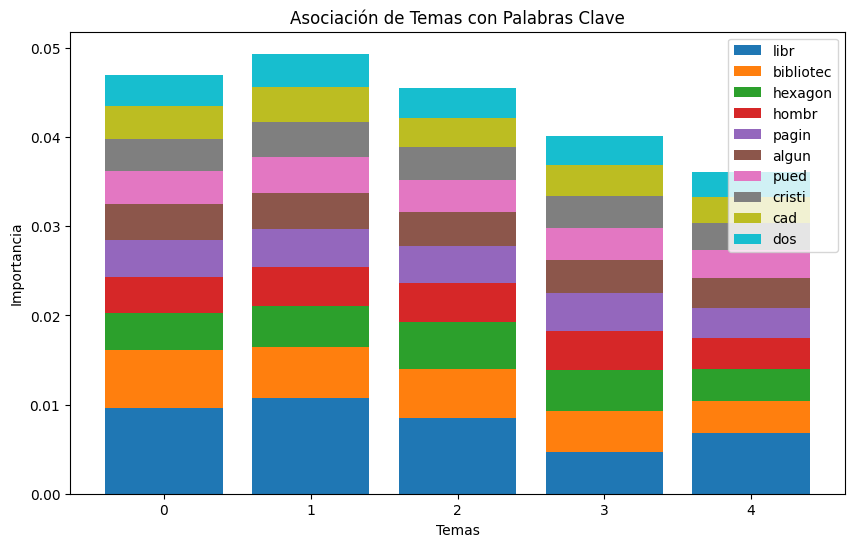

In [15]:
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=10)
stop_words = set(['pued', 'cad', 'dos', 'as', 'hac', 'ser', 'est', 'par', 'sin', 'tien', 'emma', 'algun', 'pued', 'cristi'])  # Lista de palabras ruido


# Preparar datos para la visualización
num_topics = lda_model.num_topics
num_words = 10  # número de palabras clave por tema
word_labels = [word[0] for word in topic_words[0][1]]  # lista de palabras clave
word_importance = np.zeros((num_topics, num_words))

for i, topic in enumerate(topic_words):
    for j, (word, importance) in enumerate(topic[1]):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_words):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave')
ax.set_xticks(np.arange(num_topics))
ax.legend()

# Mostrar el gráfico
plt.show()

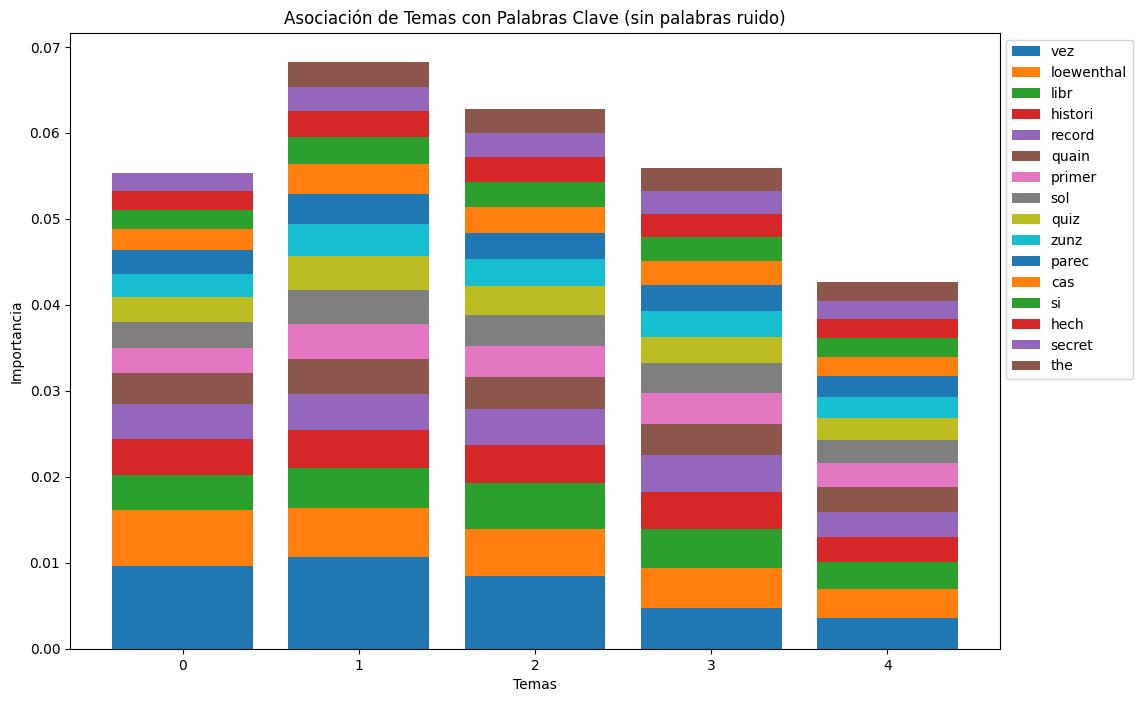

In [17]:
import numpy as np

# Obtener las palabras clave más importantes para cada tema
topic_words = lda_model.show_topics(formatted=False, num_words=20)  # Ajustar el número de palabras si es necesario
stop_words = set(['pued', 'cad', 'dos', 'as', 'hac', 'ser', 'est', 'par', 'sin', 'tien', 'emma', 'tal', 'algun'])  # Lista de palabras ruido

# Filtrar palabras ruido y preparar datos para la visualización
num_topics = lda_model.num_topics
word_labels = []
word_importance = np.zeros((num_topics, len(topic_words[0][1])))

for i, topic in enumerate(topic_words):
    topic_words_filtered = [(word, importance) for word, importance in topic[1] if word not in stop_words]
    word_labels = [word[0] for word in topic_words_filtered]
    for j, (word, importance) in enumerate(topic_words_filtered):
        word_importance[i, j] = importance

# Crear un gráfico de barras apiladas para visualizar las palabras clave por tema
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(word_labels)):
    ax.bar(np.arange(num_topics), word_importance[:, i], bottom=np.sum(word_importance[:, :i], axis=1), label=word_labels[i])

# Etiquetas y leyenda
ax.set_xlabel('Temas')
ax.set_ylabel('Importancia')
ax.set_title('Asociación de Temas con Palabras Clave (sin palabras ruido)')
ax.set_xticks(np.arange(num_topics))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

In [8]:
from nltk import ngrams
from collections import Counter

# Función para obtener n-gramas más frecuentes
def get_top_ngrams(text, n, top=10):
    # Tokenizar el texto en palabras
    words = text.split()
    
    # Obtener n-gramas
    ngrams_list = list(ngrams(words, n))
    
    # Contar la frecuencia de cada n-grama
    ngrams_freq = Counter(ngrams_list)
    
    # Obtener los top n-gramas más frecuentes
    top_ngrams = ngrams_freq.most_common(top)
    
    return top_ngrams

# Concatenar todos los textos preprocesados en una sola cadena
all_text = ' '.join([' '.join(text) for text in datos['texto_preprocesado']])

# Obtener los top 10 trigramas más frecuentes
top_trigrams = get_top_ngrams(all_text, 3)
print("Top 10 trigramas más frecuentes:")
for trigram, freq in top_trigrams:
    print(' '.join(trigram), "-", freq, "veces")

Top 10 trigramas más frecuentes:
jardin sender bifurc - 16 veces
ts ui pên - 15 veces
madam henri bacheli - 8 veces
cos ahor si - 8 veces
ahor si sid - 8 veces
sender bifurc 1941 - 7 veces
bifurc 1941 ficcion - 7 veces
1941 ficcion 1944 - 7 veces
avis present advertent - 6 veces
carl argentin daneri - 6 veces


In [10]:
from nltk import ngrams
from collections import Counter

# Modificar la función preprocess_text para devolver una cadena de texto preprocesado
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text.lower())
    
    # Eliminar puntuación y stopwords, y aplicar lematización
    preprocessed_tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
    
    # Concatenar tokens preprocesados en una sola cadena
    preprocessed_text = ' '.join(preprocessed_tokens)
    
    return preprocessed_text

# Aplicar preprocesamiento al texto en la columna "texto"
datos['texto_preprocesado'] = datos['texto'].apply(preprocess_text)

# Concatenar todos los textos preprocesados en una sola cadena
all_text = ' '.join(datos['texto_preprocesado'])

# Función para obtener n-gramas más frecuentes
def get_top_ngrams(text, n, top=10):
    # Obtener n-gramas
    ngrams_list = list(ngrams(text.split(), n))
    
    # Contar la frecuencia de cada n-grama
    ngrams_freq = Counter(ngrams_list)
    
    # Obtener los top n-gramas más frecuentes
    top_ngrams = ngrams_freq.most_common(top)
    
    return top_ngrams

# Obtener los top 10 trigramas más frecuentes
top_trigrams = get_top_ngrams(all_text, 3)
print("Top 10 trigramas más frecuentes:")
for trigram, freq in top_trigrams:
    print(' '.join(trigram), "-", freq, "veces")

Top 10 trigramas más frecuentes:
jardin sender bifurc - 16 veces
ts ui pên - 15 veces
madam henri bacheli - 8 veces
cos ahor si - 8 veces
ahor si sid - 8 veces
sender bifurc 1941 - 7 veces
bifurc 1941 ficcion - 7 veces
1941 ficcion 1944 - 7 veces
avis present advertent - 6 veces
carl argentin daneri - 6 veces


In [13]:
!pip install spacy

     --------------------------------------- 12.1/12.1 MB 26.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 98.1 MB/s eta 0:00:00
     ---------------------------------------- 394.8/394.8 kB ? eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     -------------------------------------- 122.2/122.2 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 481.9/481.9 kB ? eta 0:00:00
     ---------------------------------------- 181.6/181.6 kB ? eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 125.7 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 17.6 MB/s eta 0:00:00
     ---------------------------------------- 45.0/45.0 kB ? eta 0:00:00


In [20]:
import spacy
import nltk
from nltk.tokenize import sent_tokenize
from collections import Counter

# Descargar el tokenizador de oraciones de NLTK si no lo tienes
nltk.download('punkt')

# Cargar el modelo en español de SpaCy
nlp = spacy.load("es_core_news_sm")

# Función para obtener frases más frecuentes
def get_top_phrases(text, top=10):
    # Tokenizar el texto en oraciones utilizando NLTK
    sentences = sent_tokenize(text, language='spanish')
    
    # Procesar cada oración con SpaCy y extraer las frases completas
    phrases = []
    for sent in sentences:
        doc = nlp(sent)
        phrases.extend([sent.text.strip() for sent in doc.sents])
    
    # Contar la frecuencia de cada frase
    phrases_freq = Counter(phrases)
    
    # Obtener las top frases más frecuentes
    top_phrases = phrases_freq.most_common(top)
    
    return top_phrases

# Obtener las frases más frecuentes en el corpus
top_phrases = get_top_phrases(all_text)
print("Top 10 frases más frecuentes:")
for phrase, freq in top_phrases:
    print(phrase, "-", freq, "veces")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 frases más frecuentes:
nap sumerg caotic sig prevalec asi dorm distra sueñ cualqu pront se sueñ suel pens entonc este sueñ pur invencion volunt ilimit pod voy caus tigr incompetent nunc sueñ sab engendr apetec fier aparec tigr disec endebl impur variacion form tamañ inadmis hart fugaz tir perr pajar dialog dialog razon inmortal dej anochec encend lamp vei car indiferent dulzur convincent fervor voz macedoni fernandez repet alma inmortal asegur muert cuerp insignif mor ser hech nul pued suced hombr jug navaj macedoni abri cerr acordeon vecin despach infinit cumparsit pamplin constern gust much person mint viej propus macedoni suicid discut estorb z burlon sospech final resolv plen mistic recuerd si noch suicid uñas docil medi halag dia zapat cuer clavet fortific ded pie quier sab interes cos emit uñas lamin corn semitransparent elast defend quien brut desconfi sol dej segund preper - 2 veces
tenu armament rehus univers extasis segu elabor fin unas van punt cercen vuelv cercen bru

In [21]:
import spacy
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize
from collections import Counter

# Descargar el tokenizador de oraciones de NLTK si no lo tienes
nltk.download('punkt')

# Cargar el modelo en español de SpaCy
nlp = spacy.load("es_core_news_sm")

# Función para obtener frases más frecuentes
def get_top_phrases(text, top=10):
    # Tokenizar el texto en oraciones utilizando NLTK
    sentences = sent_tokenize(text, language='spanish')
    
    # Procesar cada oración con SpaCy y extraer las frases completas
    phrases = []
    for sent in sentences:
        doc = nlp(sent)
        phrases.extend([sent.text.strip() for sent in doc.sents])
    
    # Contar la frecuencia de cada frase
    phrases_freq = Counter(phrases)
    
    # Obtener las top frases más frecuentes
    top_phrases = phrases_freq.most_common(top)
    
    return top_phrases

# Obtener las frases más frecuentes en el corpus
top_phrases = get_top_phrases(all_text)

# Crear un DataFrame de pandas para los resultados
df = pd.DataFrame(top_phrases, columns=['Frase', 'Frecuencia'])

# Imprimir el DataFrame
print(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               Frase  Frecuencia
0  nap sumerg caotic sig prevalec asi dorm distra...           2
1  tenu armament rehus univers extasis segu elabo...           2
2  fervor buen air 1923 prolog edicion 1969 reesc...           1
3  apen aventur abrum inmortal distanci perd hond...           1
4  baj absolu arbol acaciascu piad curv atenu rig...           1
5  tod vid humild pued pis noch dios olvid men in...           1
6  asi afirm restablec text ningun line fabric go...           1
7  moor perplej ignor verdader longitud puent rel...           1
8  menard elig realid tierr carm sigl lepant lop ...           1
9  bod filantrop internacional simon kautzsch tan...           1


**función de preprocesamiento de texto**

In [62]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

def preprocesar_texto(texto):
    # Convierte a minúsculas
    texto = texto.lower()
    # Elimina caracteres especiales y números
    texto = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', texto)
    # Tokenización
    tokens = word_tokenize(texto, language='spanish')
    # Elimina stopwords
    stopwords_espanol = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word not in stopwords_espanol]
    # Une los tokens preprocesados en un string nuevamente
    texto_preprocesado = ' '.join(tokens)
    return texto_preprocesado

datos['Texto_Preprocesado'] = datos['texto'].apply(preprocesar_texto)

In [63]:
# Reducción de dimensiones con PCA
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(datos['Texto_Preprocesado'])

# Verifica cuántas muestras tienes
n_muestras = X.shape[0]

# Reduce la cantidad de componentes principales si es necesario
n_componentes_pca = min(50, n_muestras)  # Puedes ajustar este número según tus necesidades

pca = PCA(n_components=n_componentes_pca)
X_pca = pca.fit_transform(X.toarray())
X_pca


array([[-1.47898611e-01,  1.79950994e-01, -9.04422636e-02, ...,
        -2.69211437e-06,  9.79514920e-17,  8.15493081e-18],
       [-1.74314817e-01,  1.17684690e-01,  6.33990164e-02, ...,
         2.72565300e-06,  9.79514920e-17,  8.15493081e-18],
       [ 2.90206495e-01, -1.11438183e-02, -9.09344534e-02, ...,
        -9.97811777e-07,  9.79514920e-17,  8.15493081e-18],
       ...,
       [-1.39173140e-01, -1.17268105e-02,  3.67802265e-01, ...,
         2.15844637e-06,  9.79514920e-17,  8.15493081e-18],
       [-4.21676758e-02, -1.13770306e-01,  1.19807970e-01, ...,
        -3.33140247e-06,  9.79514920e-17,  8.15493081e-18],
       [-3.11674142e-02, -7.96220350e-02, -1.30529241e-01, ...,
        -2.28627293e-06,  9.79514920e-17,  8.15493081e-18]])

In [64]:
from sklearn.manifold import TSNE

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

X_tsne

array([[-2.973835 , -2.2411256],
       [-3.0614944, -2.416434 ],
       [-3.3939009, -1.0253175],
       [-2.9223423, -1.2089118],
       [-3.183294 , -3.0781293],
       [-2.6414113, -1.3751944],
       [-3.573137 , -1.0076718],
       [-3.573137 , -1.0076718],
       [-3.0184462, -2.2300692],
       [-1.8278909, -1.582364 ],
       [-2.8554573, -1.0171349],
       [-2.5610695, -1.3387513],
       [-2.6836538, -1.9241642],
       [-2.4655876, -2.0957637],
       [-4.215758 , -2.025406 ],
       [-2.2290323, -2.9471693],
       [-2.393757 , -2.7773838],
       [-3.7260914, -2.441846 ],
       [-3.9649777, -2.3746703],
       [-2.1332667, -2.5206072],
       [-2.376384 , -3.0655658],
       [-2.7429886, -2.027203 ],
       [-3.2685695, -2.0162044],
       [-2.3984532, -2.1367052],
       [-1.5580311, -1.8276181],
       [-3.4049559, -2.6651356],
       [-2.623003 , -2.5979557],
       [-2.2363694, -2.1500375],
       [-4.1056943, -2.0481727],
       [-2.2629359, -1.3291428],
       [-2

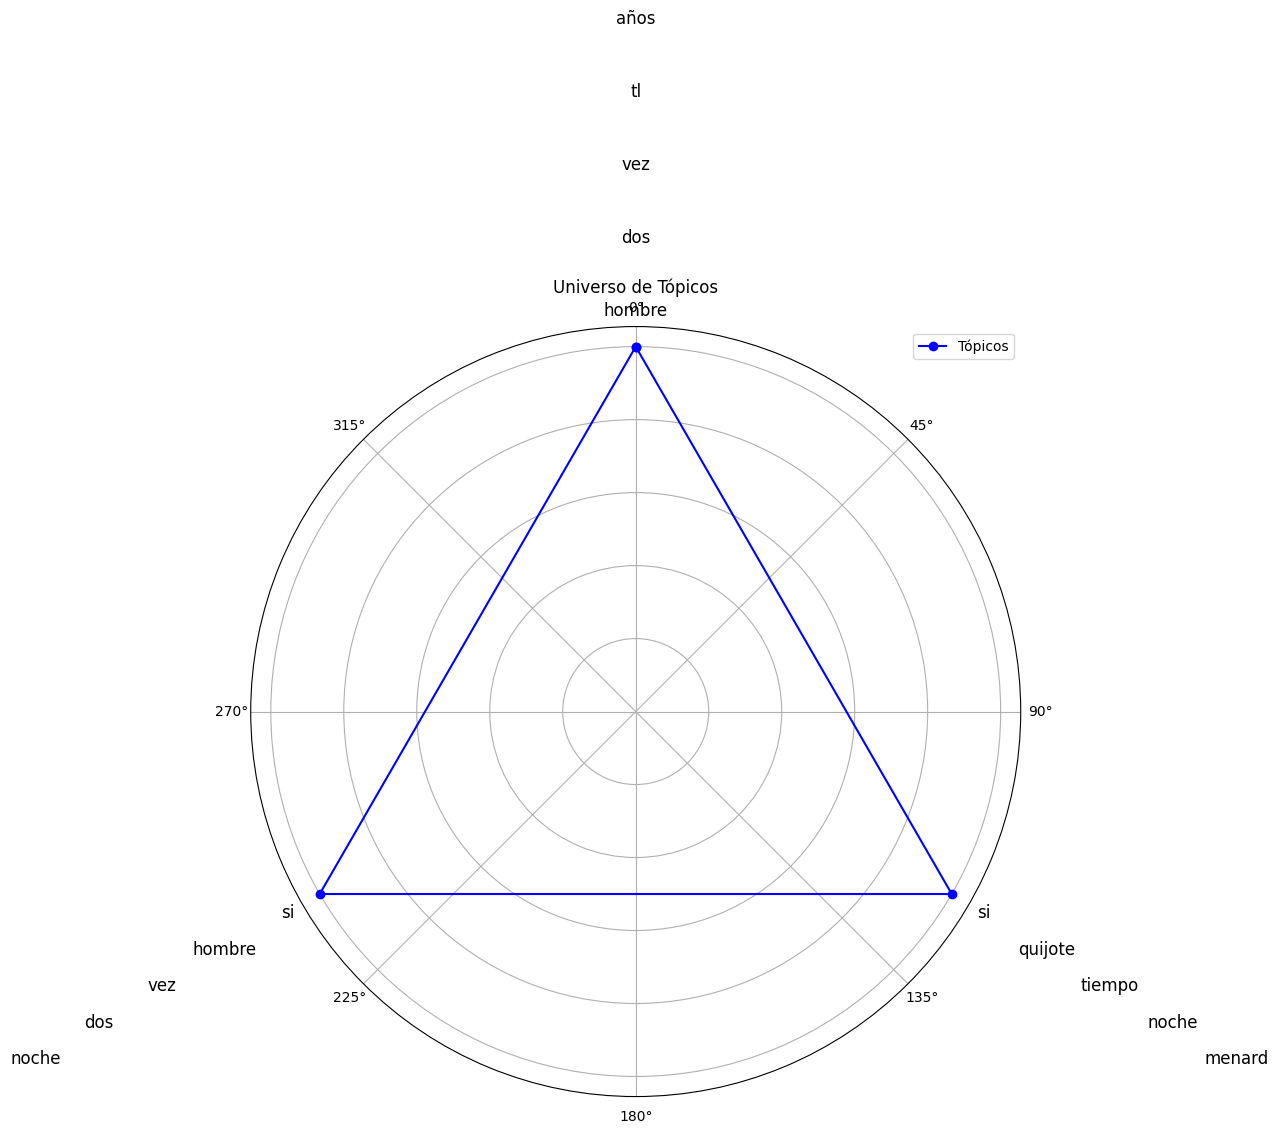

In [65]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Entrenar modelo LDA
num_topics = 3  # Número de tópicos
vectorizer = CountVectorizer(max_features=5000)
X_counts = vectorizer.fit_transform(datos['Texto_Preprocesado'])
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X_counts)

# Obtener las palabras más representativas de cada tópico
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[f'Tópico {topic_idx+1}'] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names, n_top_words=5)

# Visualizar los tópicos con las palabras asociadas
def plot_topic_universe(top_words):
    num_topics = len(top_words)
    angles = np.linspace(0, 2 * np.pi, num_topics, endpoint=False).tolist()

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    # Plot tópicos como puntos en un círculo
    ax.plot(angles + angles[:1], [1] * (num_topics + 1), marker='o', linestyle='-', color='b', label='Tópicos')

    # Mostrar palabras asociadas a cada tópico
    for i, (topic, words) in enumerate(top_words.items()):
        r = 1.1  # Radio de las palabras
        theta = angles[i]
        for word in words:
            ax.text(theta, r, word, fontsize=12, ha='center', va='center')
            r += 0.2  # Incremento para evitar superposición de palabras

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_yticklabels([])
    plt.title('Universo de Tópicos')
    plt.legend(loc='upper right')
    plt.show()

# Llama a la función para visualizar el universo de tópicos
plot_topic_universe(top_words)

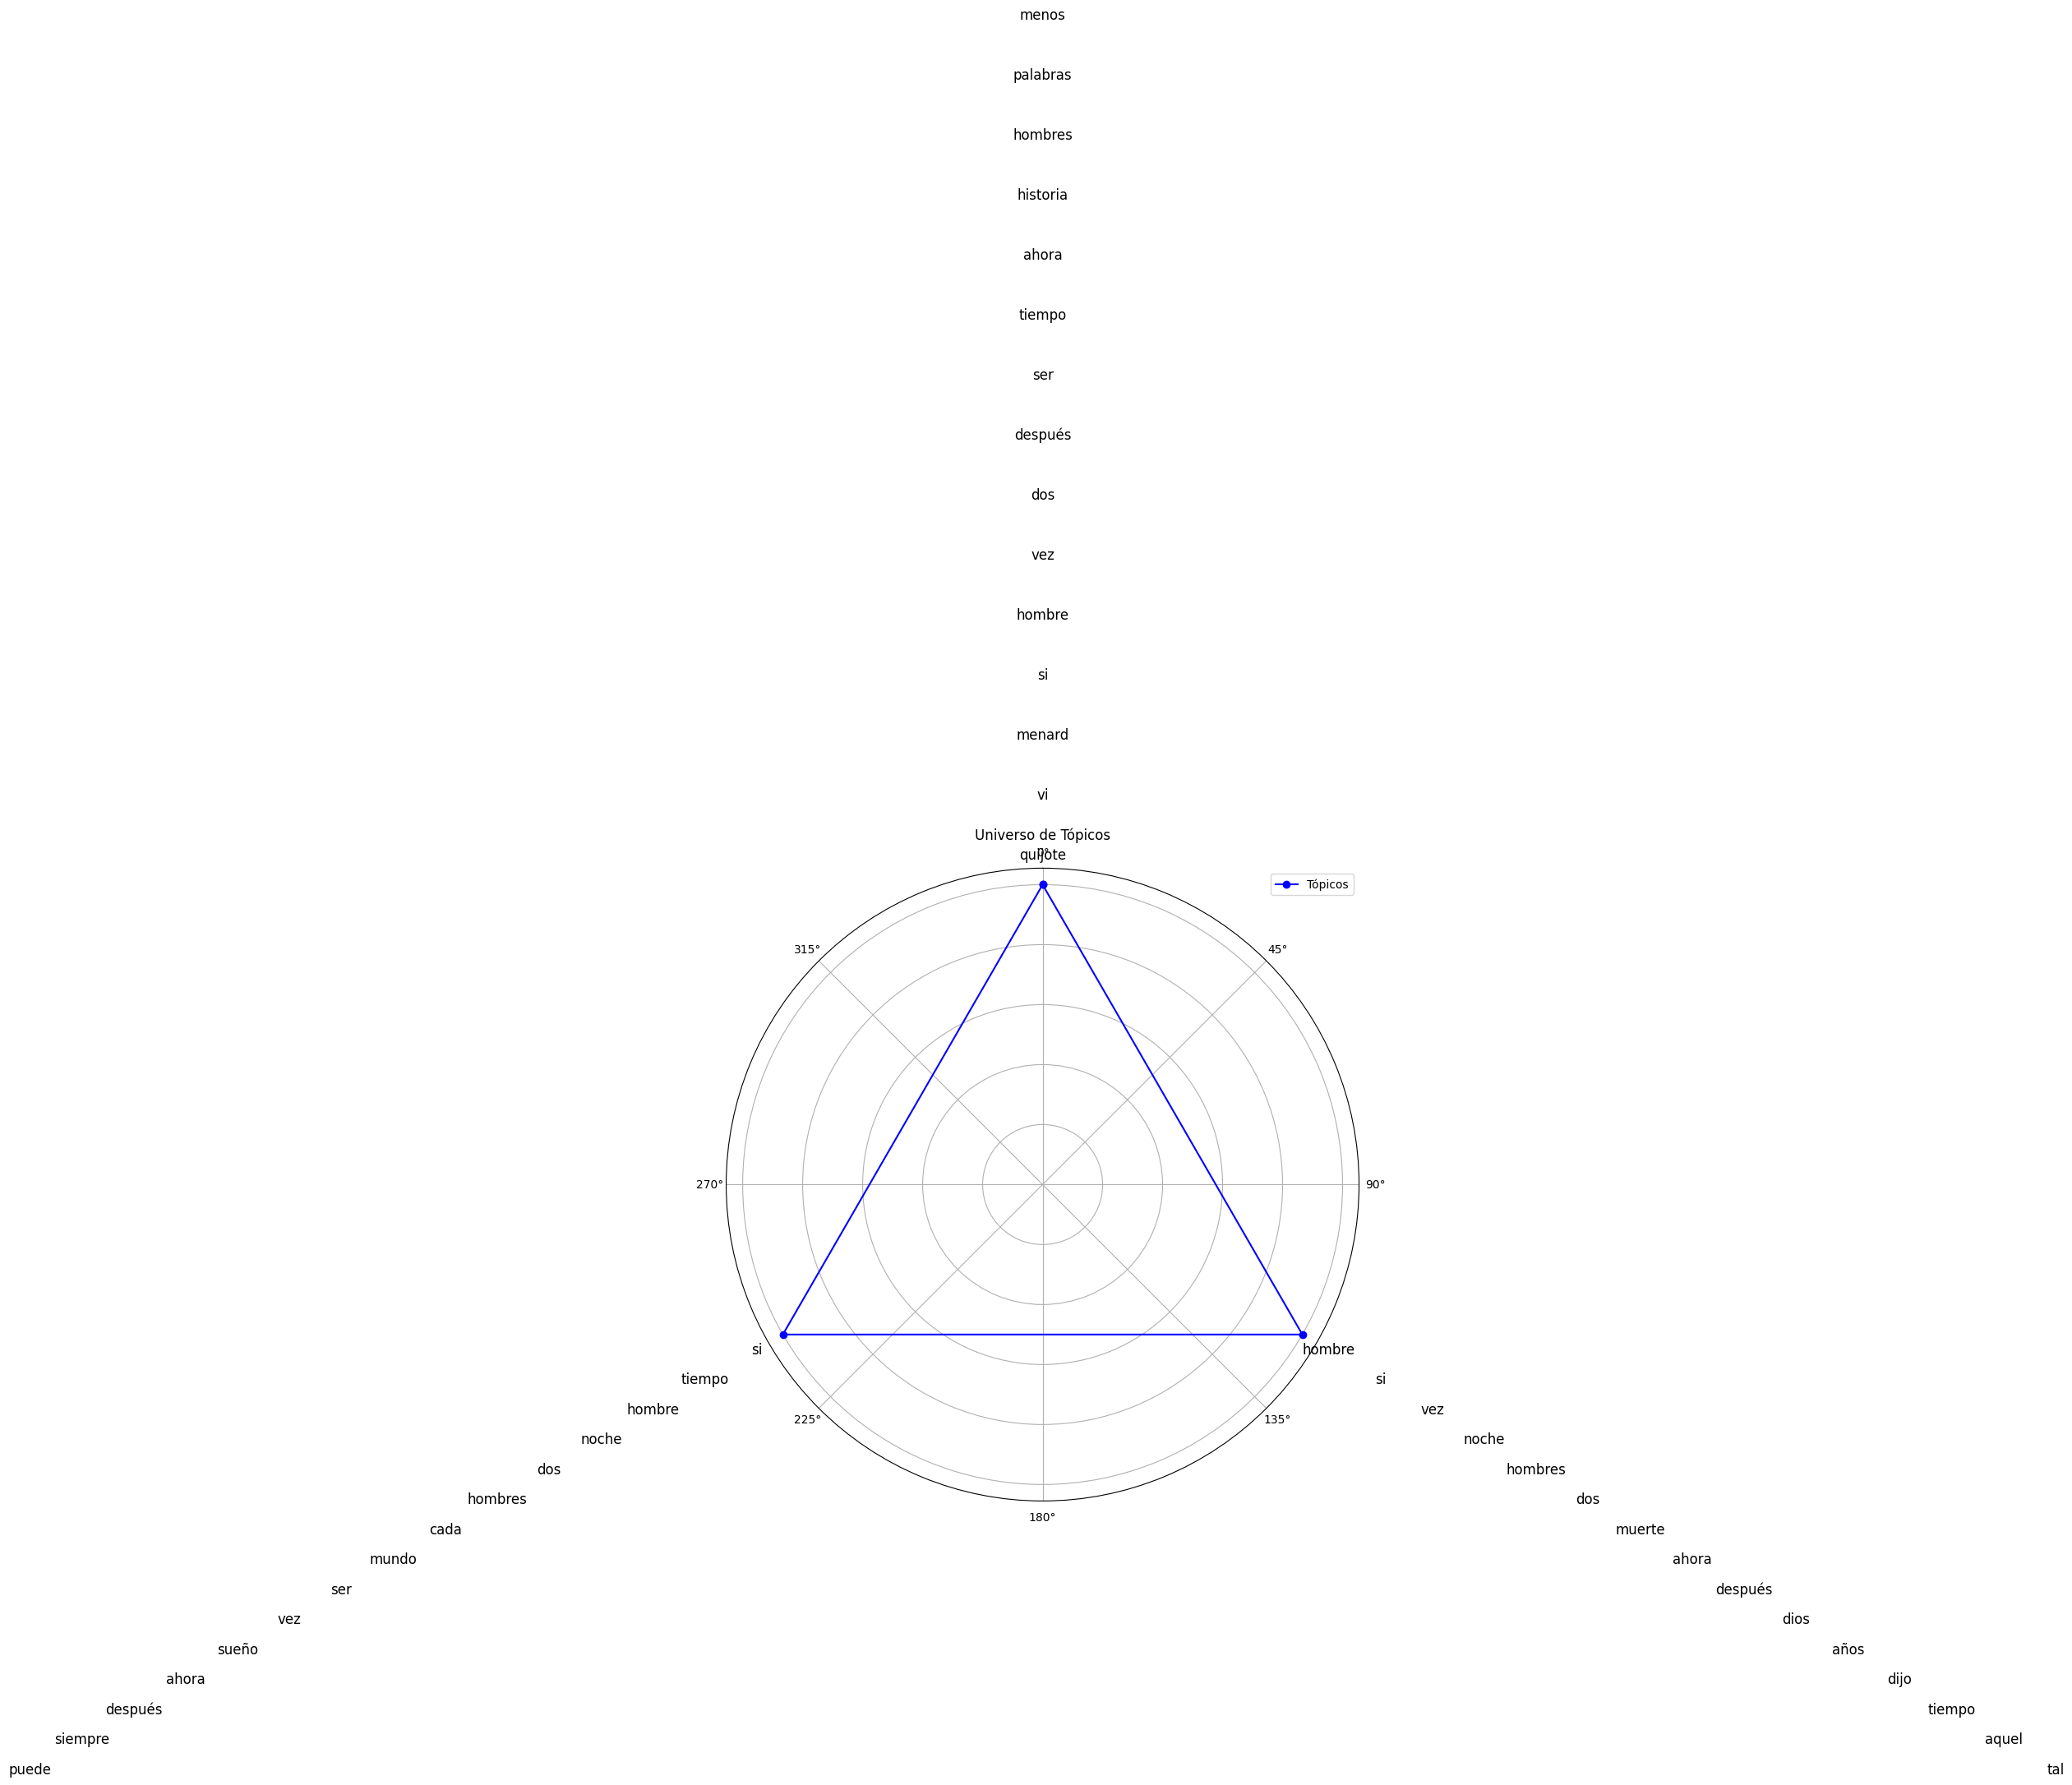

In [69]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Lista personalizada de palabras comunes en español
stop_words_spanish = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", 
    "con", "no", "una", "su", "al", "lo", "como", "más", "pero", "sus", "le", "ya", "o", "este", 
    "sí", "porque", "esta", "entre", "cuando", "muy", "sin", "sobre", "también", "me", "hasta", 
    "hay"
]

# Entrenar modelo LDA
num_topics = 3  # Número de tópicos
vectorizer = CountVectorizer(max_features=10000, stop_words=stop_words_spanish)
X_counts = vectorizer.fit_transform(datos['Texto_Preprocesado'])
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X_counts)

# Obtener las palabras más representativas de cada tópico
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[f'Tópico {topic_idx+1}'] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names, n_top_words=15)  # Ajusta este número según tus preferencias

# Visualizar los tópicos con las palabras asociadas
def plot_topic_universe(top_words):
    num_topics = len(top_words)
    angles = np.linspace(0, 2 * np.pi, num_topics, endpoint=False).tolist()

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    # Plot tópicos como puntos en un círculo
    ax.plot(angles + angles[:1], [1] * (num_topics + 1), marker='o', linestyle='-', color='b', label='Tópicos')

    # Mostrar palabras asociadas a cada tópico
    for i, (topic, words) in enumerate(top_words.items()):
        r = 1.1  # Radio de las palabras
        theta = angles[i]
        for word in words:
            ax.text(theta, r, word, fontsize=12, ha='center', va='center')
            r += 0.2  # Incremento para evitar superposición de palabras

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_yticklabels([])
    plt.title('Universo de Tópicos')
    plt.legend(loc='upper right')
    plt.show()

# Llama a la función para visualizar el universo de tópicos
plot_topic_universe(top_words)

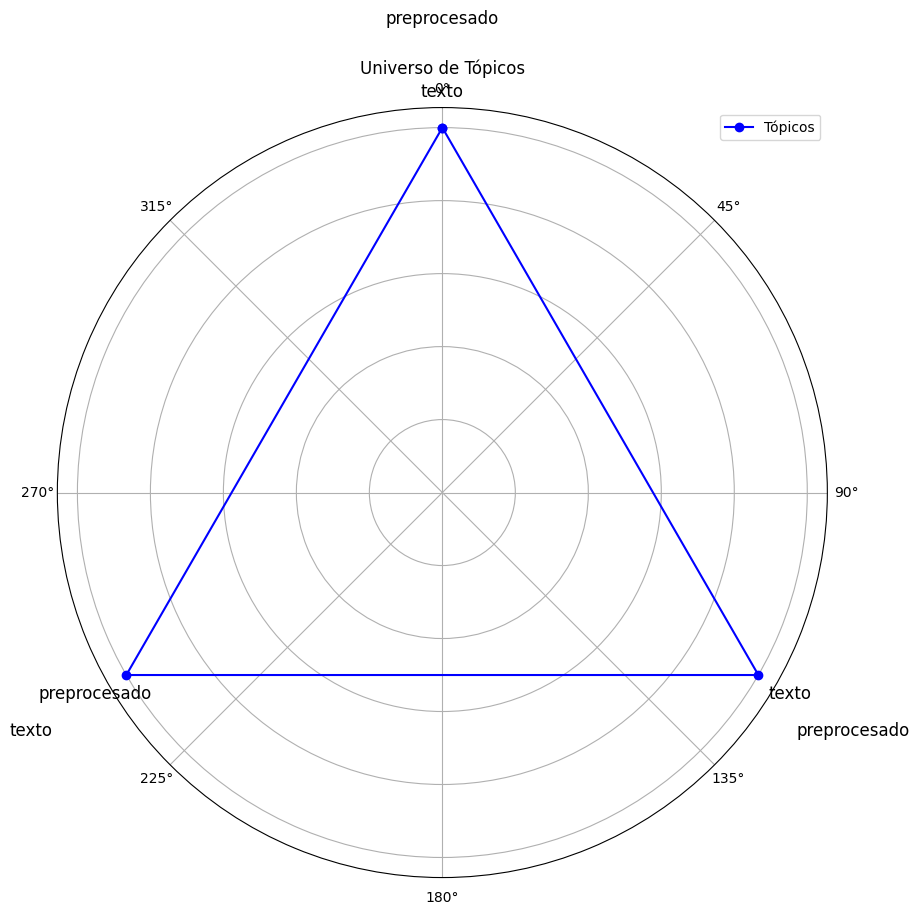

In [71]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que datos['Texto_Preprocesado'] contenga textos preprocesados correctamente
# Reemplaza esta línea con tu propio conjunto de datos preprocesado
datos = {
    'Texto_Preprocesado': ['texto preprocesado 1', 'texto preprocesado 2', 'texto preprocesado 3']
}

# Lista personalizada de palabras comunes en español
stop_words_spanish = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", 
    "con", "no", "una", "su", "al", "lo", "como", "más", "pero", "sus", "le", "ya", "o", "este", 
    "sí", "porque", "esta", "entre", "cuando", "muy", "sin", "sobre", "también", "me", "hasta", 
    "hay"
]

# Entrenar modelo LDA
num_topics = 3  # Número de tópicos
vectorizer = CountVectorizer(max_features=10000, stop_words=stop_words_spanish)
X_counts = vectorizer.fit_transform(datos['Texto_Preprocesado'])
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X_counts)

# Obtener las palabras más representativas de cada tópico
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[f'Tópico {topic_idx+1}'] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names, n_top_words=15)  # Ajusta este número según tus preferencias

# Visualizar los tópicos con las palabras asociadas
def plot_topic_universe(top_words):
    num_topics = len(top_words)
    angles = np.linspace(0, 2 * np.pi, num_topics, endpoint=False).tolist()

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    # Plot tópicos como puntos en un círculo
    ax.plot(angles + angles[:1], [1] * (num_topics + 1), marker='o', linestyle='-', color='b', label='Tópicos')

    # Mostrar palabras asociadas a cada tópico
    for i, (topic, words) in enumerate(top_words.items()):
        r = 1.1  # Radio de las palabras
        theta = angles[i]
        for word in words:
            ax.text(theta, r, word, fontsize=12, ha='center', va='center')
            r += 0.2  # Incremento para evitar superposición de palabras

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_yticklabels([])
    plt.title('Universo de Tópicos')
    plt.legend(loc='upper right')
    plt.show()

# Llama a la función para visualizar el universo de tópicos
plot_topic_universe(top_words)

AttributeError: 'list' object has no attribute 'values'

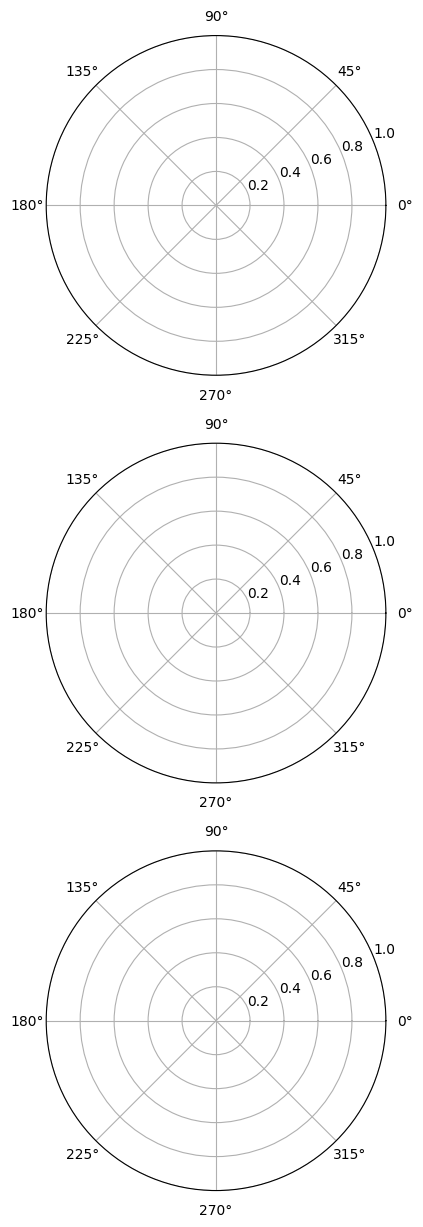

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def plot_topics_radar(topics_per_year):
    num_years = len(topics_per_year)
    num_topics = max(len(top_words) for top_words in topics_per_year.values())
    angles = np.linspace(0, 2 * np.pi, num_topics, endpoint=False).tolist()

    fig, axs = plt.subplots(num_years, figsize=(10, 5*num_years), subplot_kw=dict(polar=True))

    for i, (year, top_words) in enumerate(topics_per_year.items()):
        ax = axs[i] if num_years > 1 else axs
        words_count = [len(words) for words in top_words.values()]

        ax.plot(angles, words_count, linestyle='-', linewidth=2, label=year)
        ax.fill(angles, words_count, alpha=0.25)

        ax.set_title(f'Palabras por tópico - {year}')
        ax.legend(loc='upper right')

        ax.set_xticks(angles)
        ax.set_xticklabels([f'Tópico {i+1}' for i in range(num_topics)])

    plt.tight_layout()
    plt.show()

# Visualizar los tópicos y palabras asociadas a cada año como un diagrama de radar
plot_topics_radar(topics_per_year)

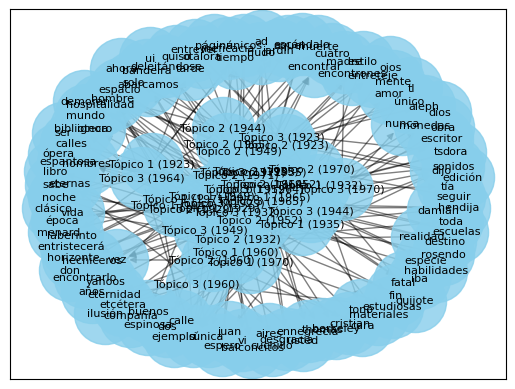

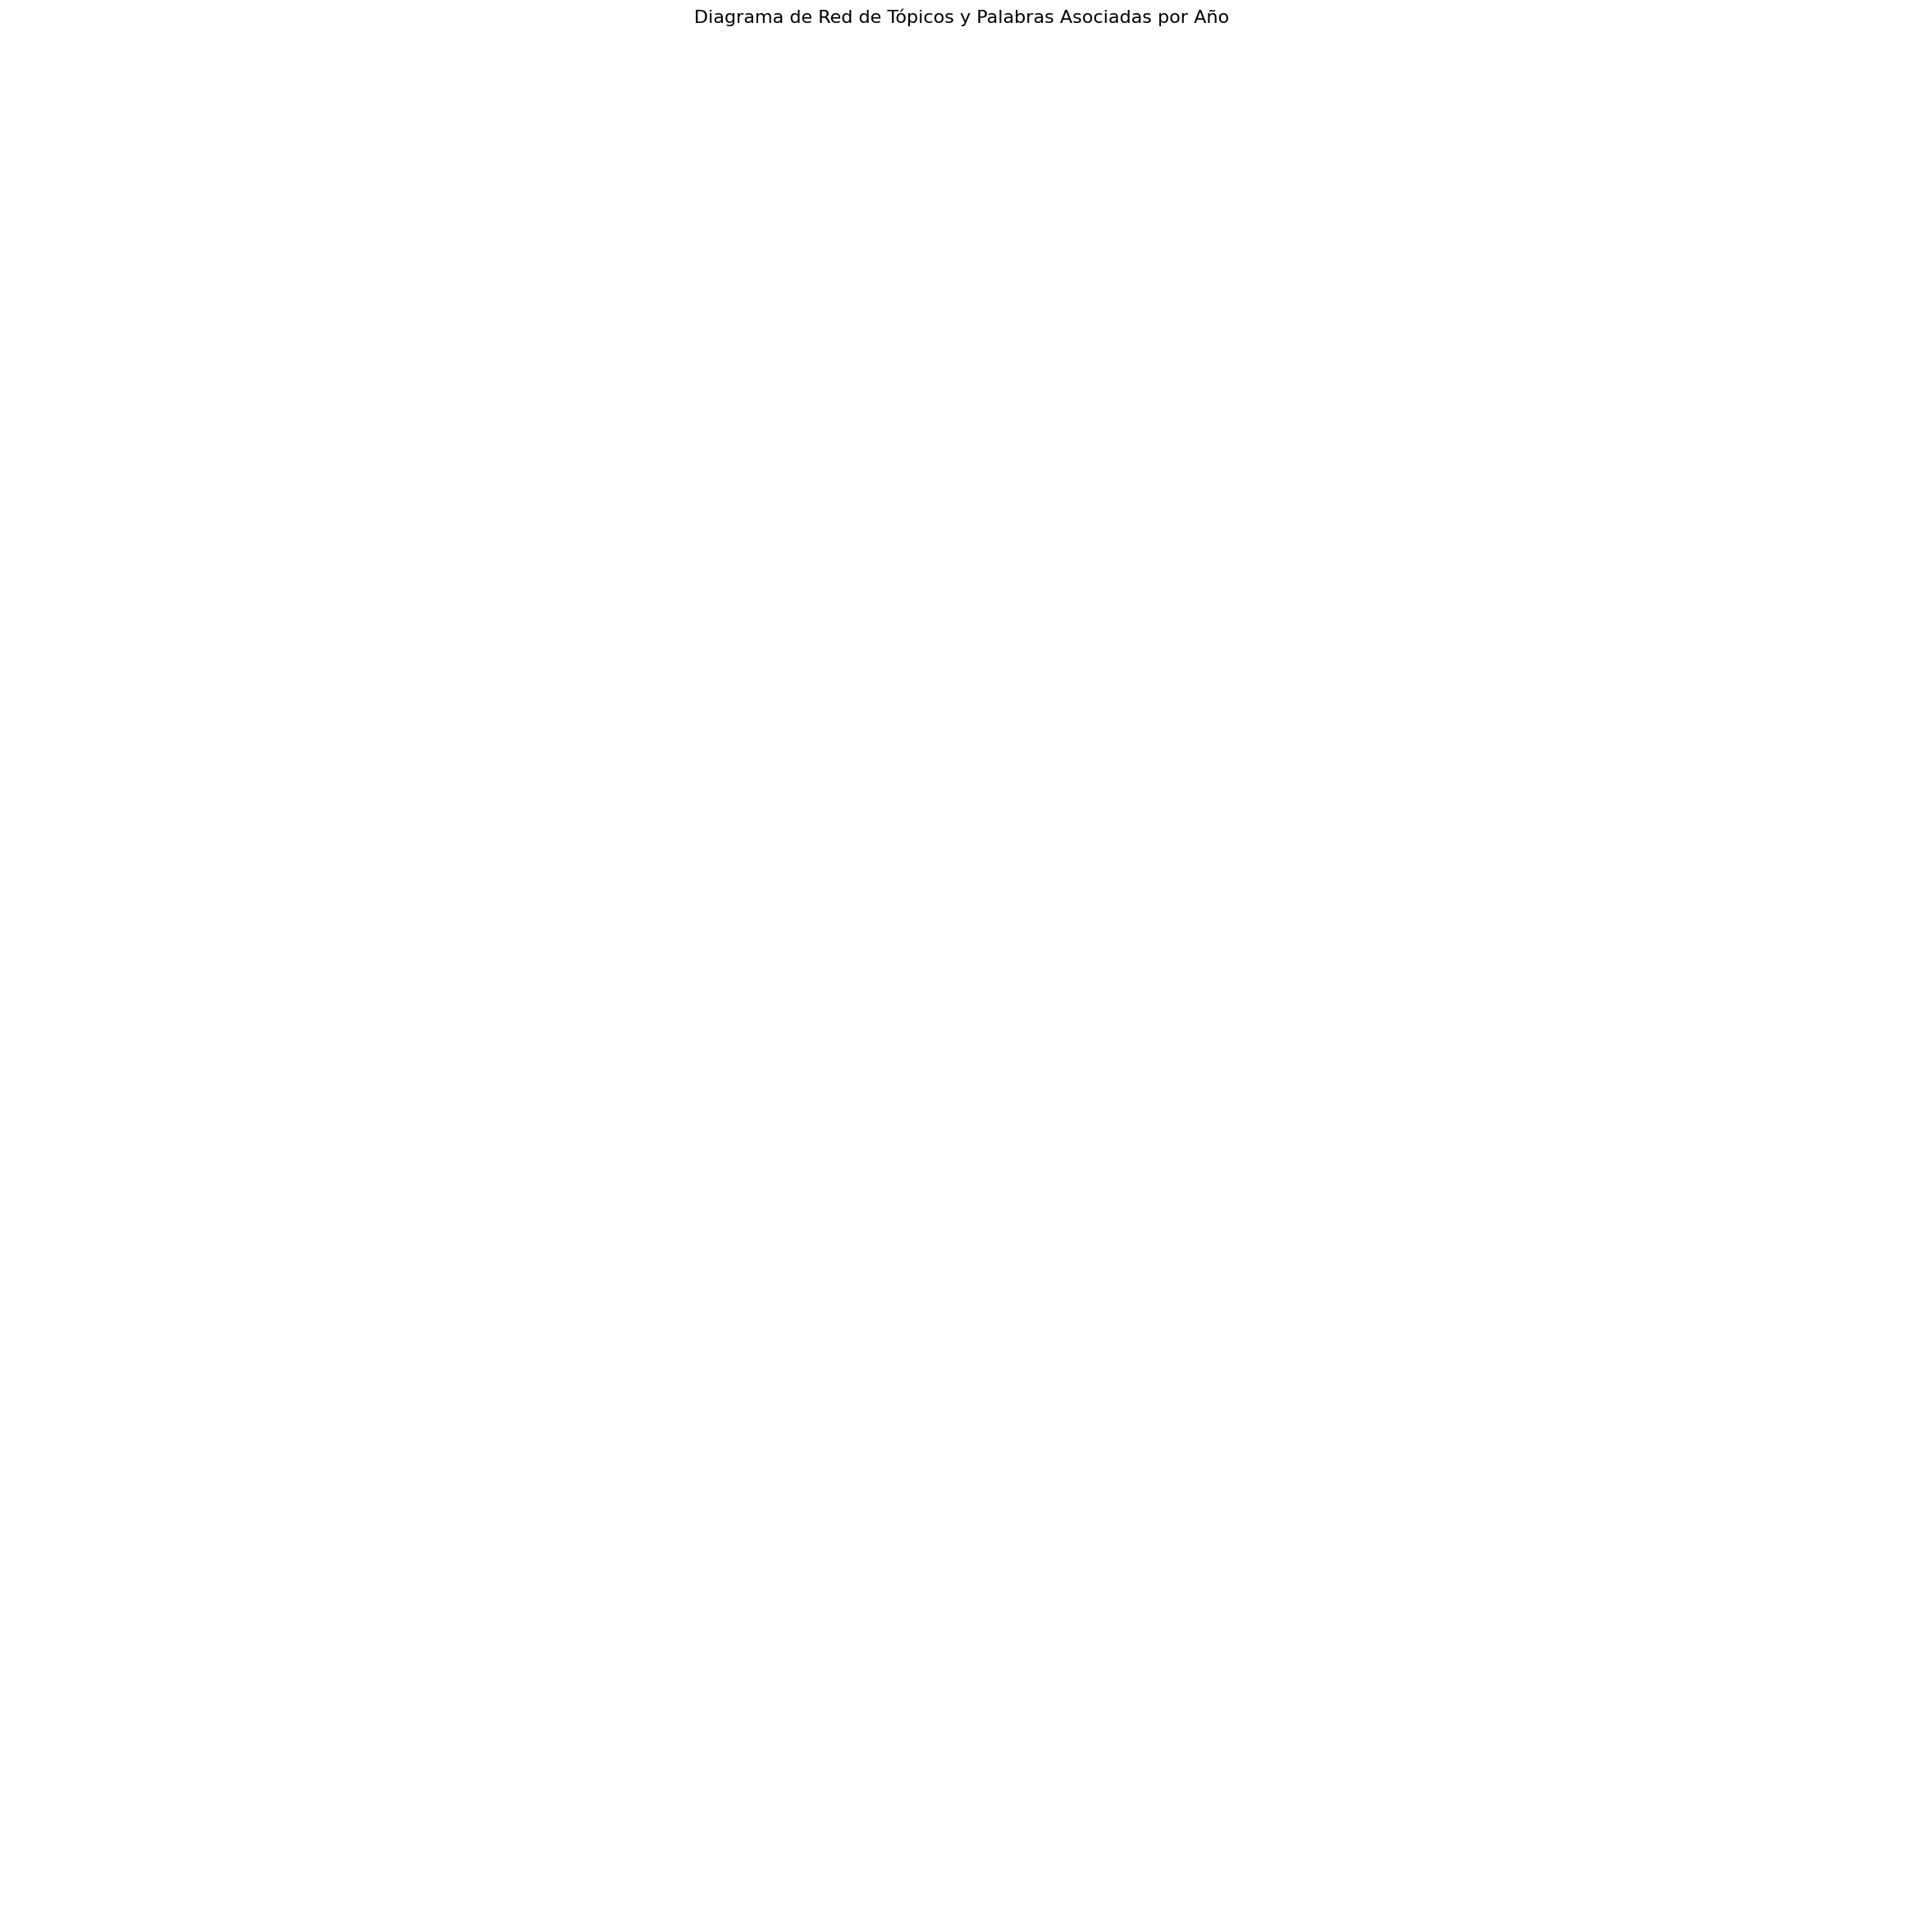

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Función para visualizar los tópicos y palabras asociadas a cada año como un diagrama de red
def plot_topics_network(topics_per_year):
    # Creamos un grafo dirigido
    G = nx.DiGraph()

    # Agregamos nodos (tópicos y palabras)
    for year, top_words in topics_per_year.items():
        for topic, words in top_words.items():
            G.add_node(f'{topic} ({year})', type='topic')
            for word in words:
                G.add_node(word, type='word')
                G.add_edge(f'{topic} ({year})', word)

    # Definimos la posición de los nodos
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Dibujamos los nodos y las aristas
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2000, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

    # Mostramos el grafo
    plt.figure(figsize=(30, 30))
    plt.title('Diagrama de Red de Tópicos y Palabras Asociadas por Año', fontsize=16)
    plt.axis('off')
    plt.show()

# Visualizar los tópicos y palabras asociadas a cada año como un diagrama de red
plot_topics_network(topics_per_year)

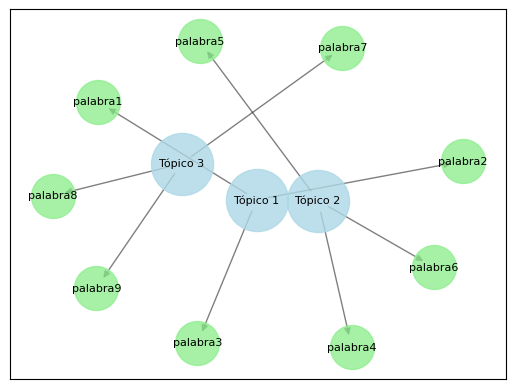

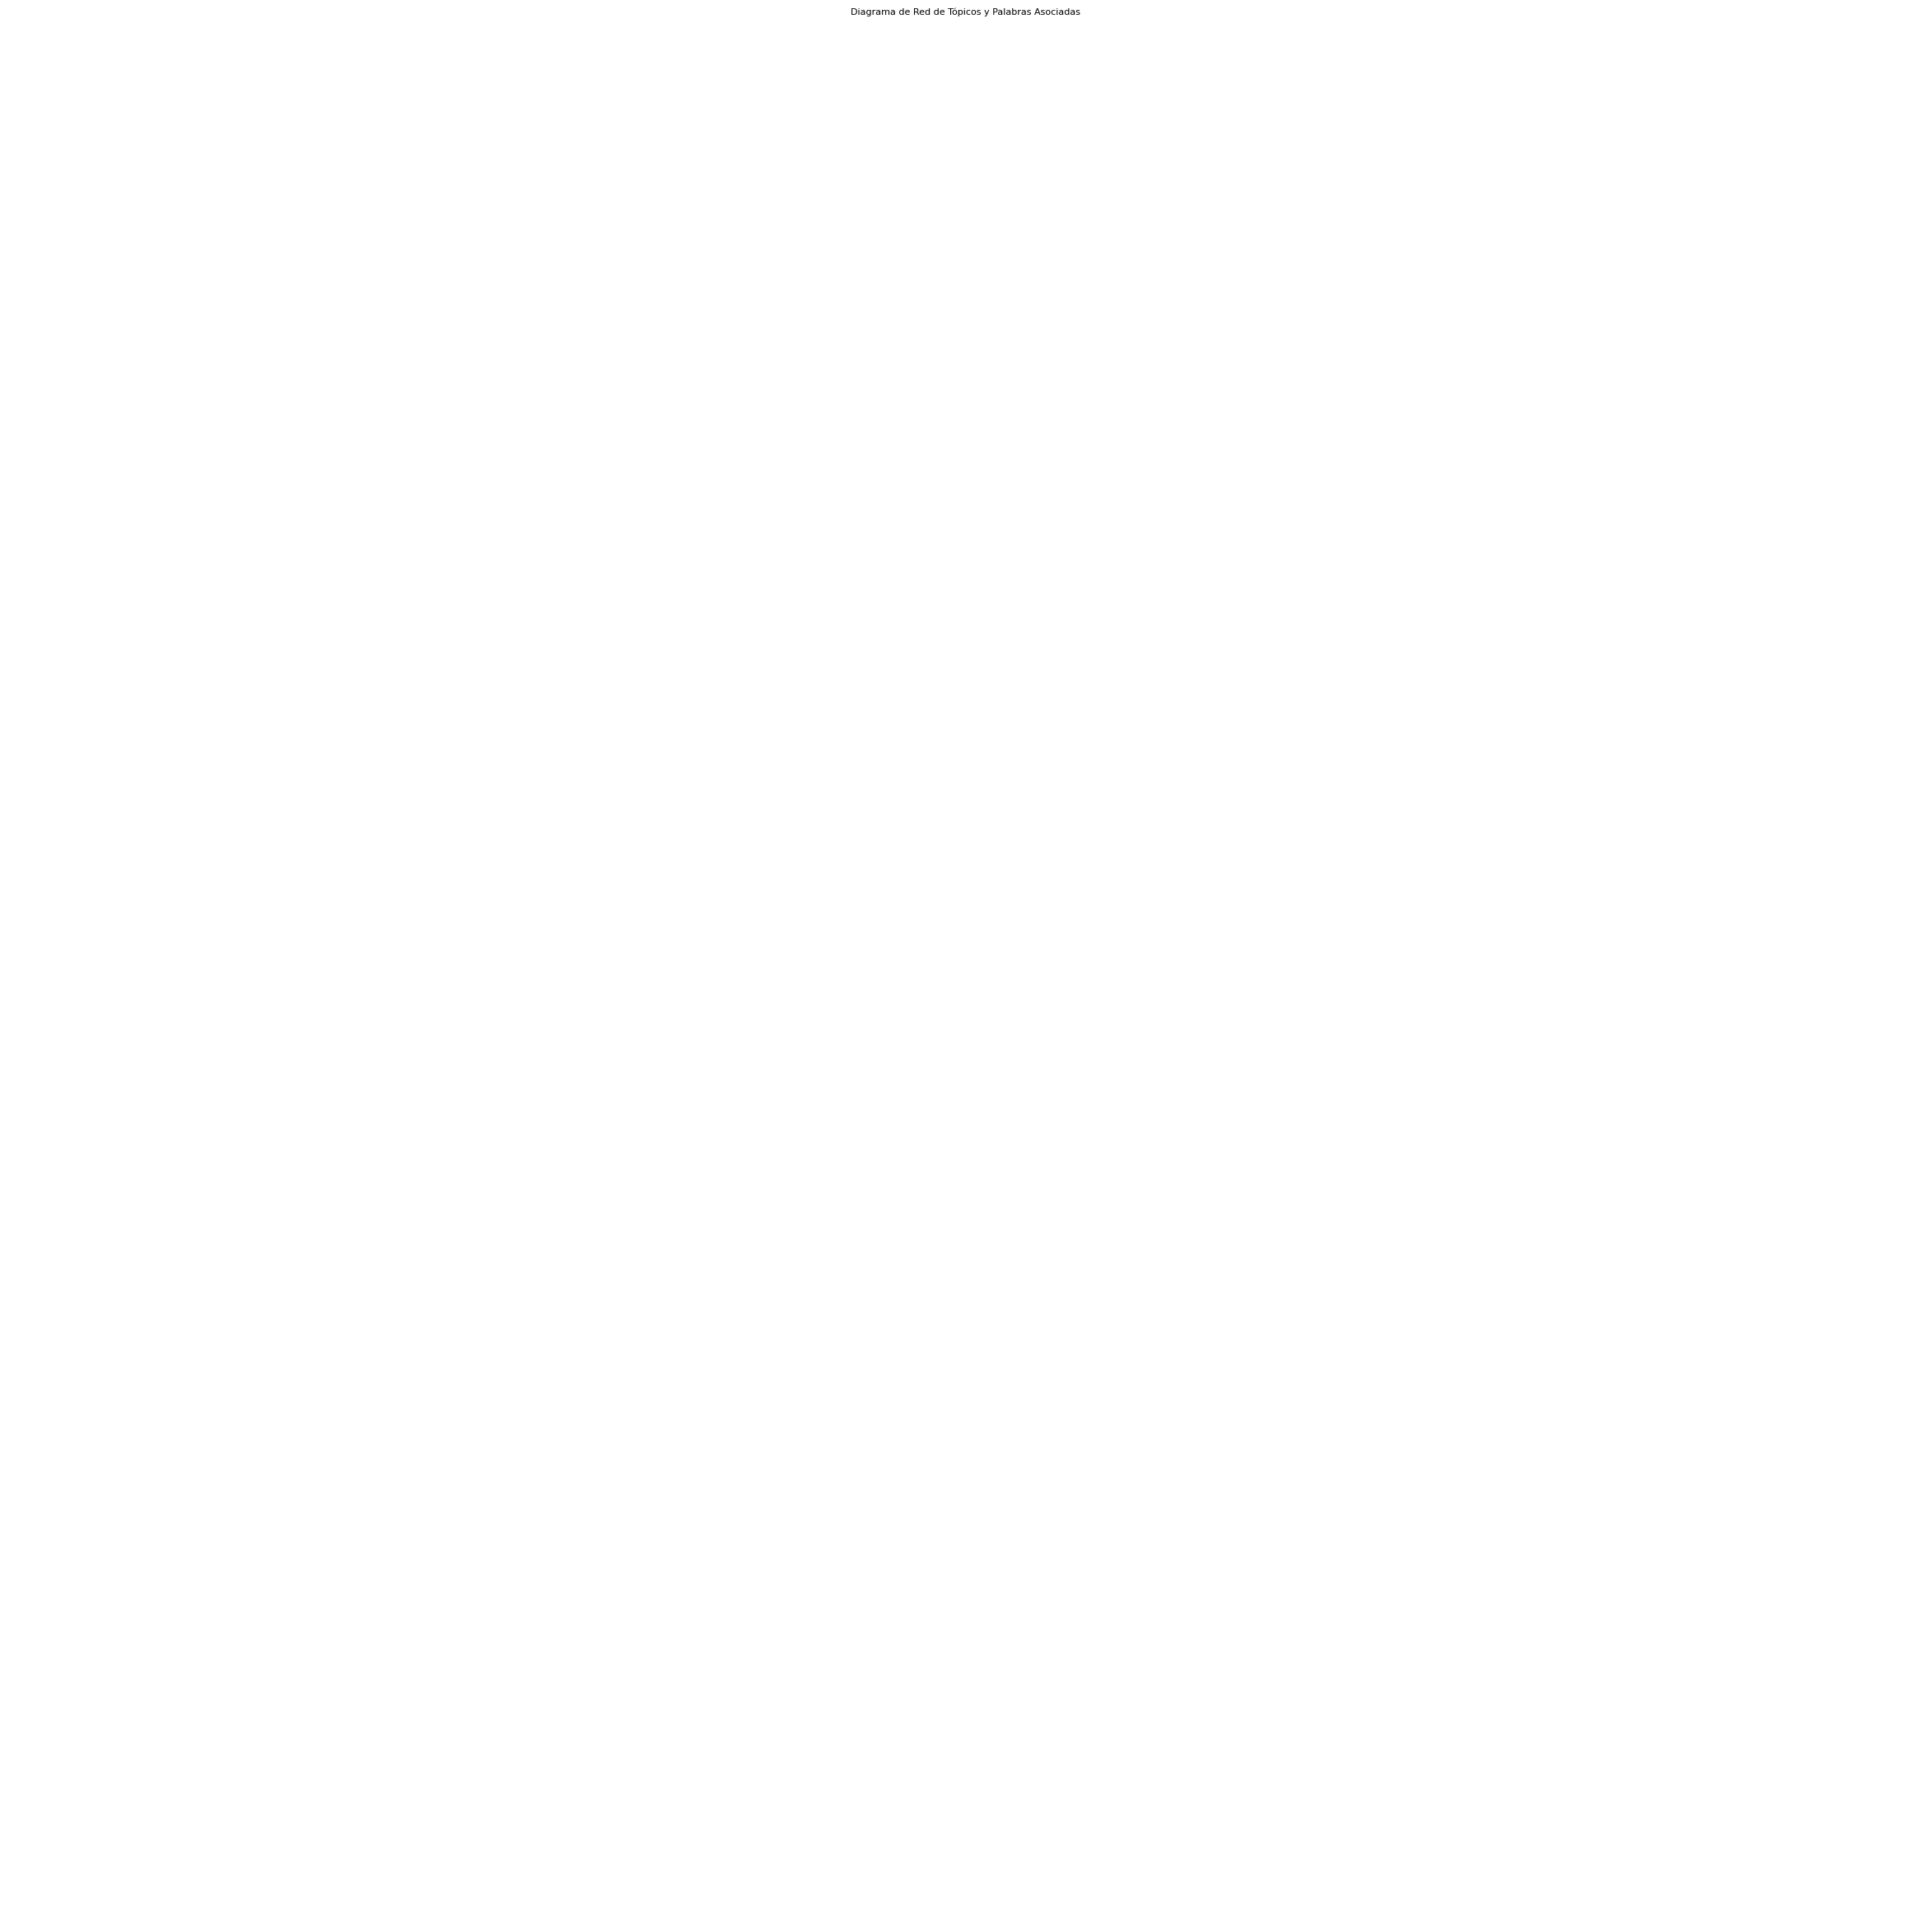

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Función para visualizar los tópicos y palabras asociadas como una red
def plot_topics_network(topics_per_year):
    # Creamos un grafo dirigido
    G = nx.DiGraph()

    # Agregamos nodos (tópicos y palabras)
    for topic, words in topics_per_year.items():
        G.add_node(topic, type='topic')
        for word in words:
            G.add_node(word, type='word')
            G.add_edge(topic, word)

    # Definimos la posición de los nodos
    pos = nx.spring_layout(G, k=1.5, iterations=100)

    # Dibujamos los nodos y las aristas
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if 'topic' in G.nodes[node]['type']], node_color='lightblue', node_size=2000, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if 'word' in G.nodes[node]['type']], node_color='lightgreen', node_size=1000, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

    # Mostramos el grafo
    plt.figure(figsize=(30, 30))
    plt.title('Diagrama de Red de Tópicos y Palabras Asociadas', fontsize=8)
    plt.axis('off')
    plt.show()

# Ejemplo de uso
topics_per_year = {
    'Tópico 1': ['palabra1', 'palabra2', 'palabra3'],
    'Tópico 2': ['palabra4', 'palabra5', 'palabra6'],
    'Tópico 3': ['palabra7', 'palabra8', 'palabra9']
}

# Visualizar los tópicos y palabras asociadas como una red
plot_topics_network(topics_per_year)

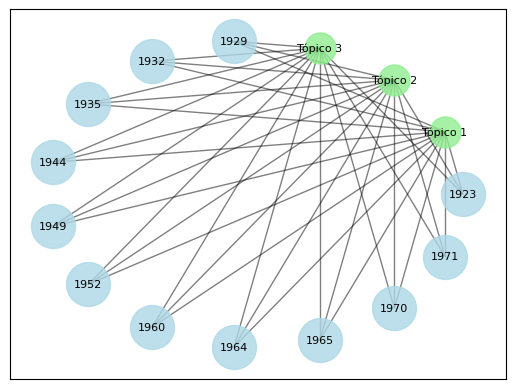

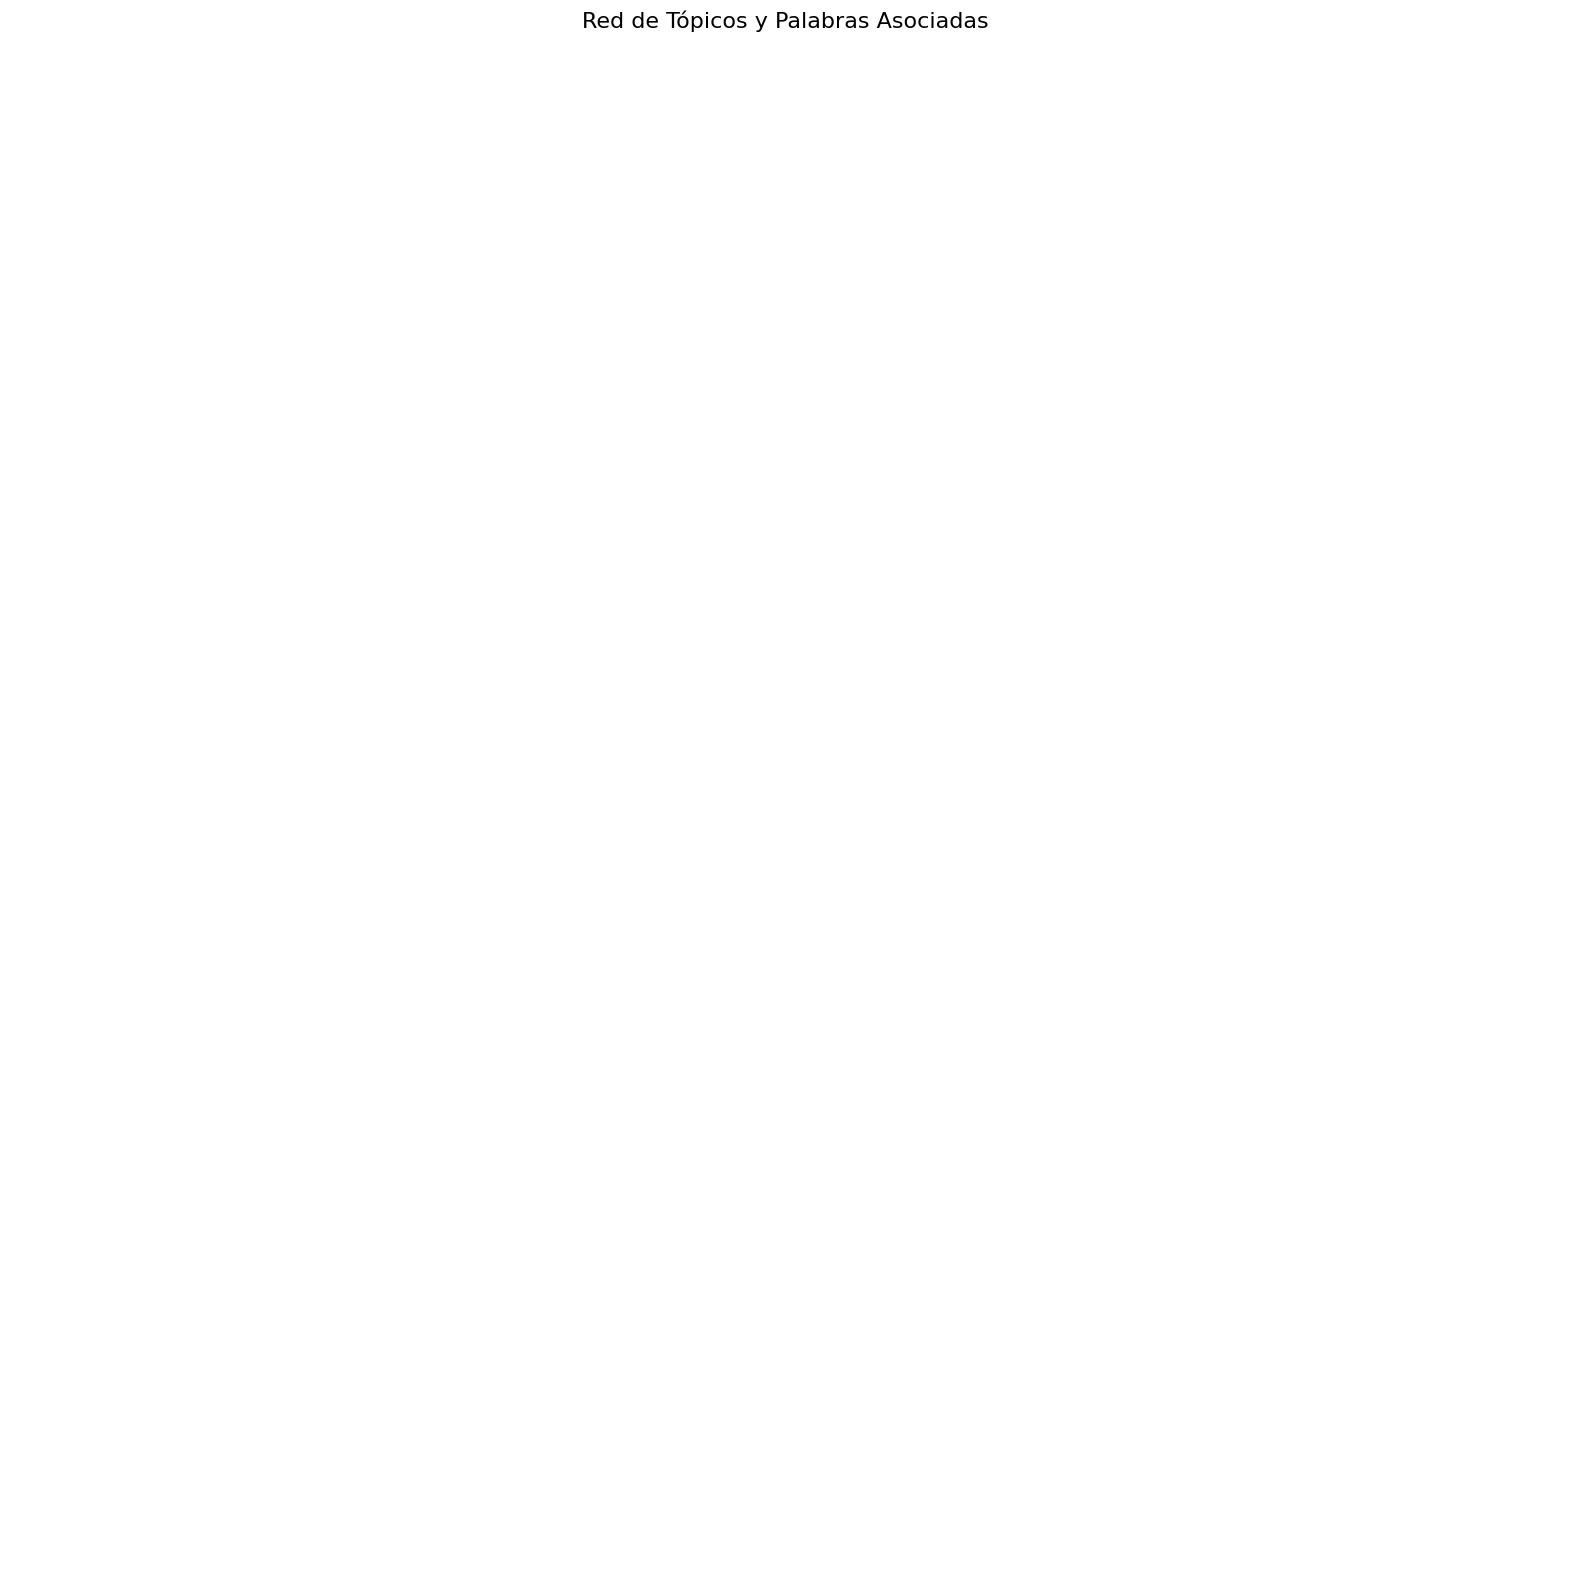

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Función para visualizar los tópicos y palabras asociadas como una red
def plot_topics_network(topics_per_year):
    # Creamos un grafo dirigido
    G = nx.Graph()

    # Agregamos nodos (tópicos y palabras)
    for topic, words in topics_per_year.items():
        G.add_node(topic, type='topic')
        for word in words:
            G.add_node(word, type='word')
            G.add_edge(topic, word)

    # Definimos la posición de los nodos
    pos = nx.circular_layout(G)

    # Dibujamos los nodos y las aristas
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if 'topic' in G.nodes[node]['type']], node_color='lightblue', node_size=1000, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if 'word' in G.nodes[node]['type']], node_color='lightgreen', node_size=500, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

    # Mostramos el grafo
    plt.figure(figsize=(20, 20))
    plt.title('Red de Tópicos y Palabras Asociadas', fontsize=16)
    plt.axis('off')
    plt.show()

# Visualizar los tópicos y palabras asociadas como una red
plot_topics_network(topics_per_year)